# Caso: Campaña de aceptación de una tarjeta de crédito

## Descripción inicial del dataset

In [9]:
#pip install scipy

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis

plt.style.use('ggplot')

In [11]:
data = pd.read_csv('../src/data/raw/data_p_bank.csv')

In [12]:
data.head()

,MES_CORTE,ID,LINEA_TC,TIPO_FLUJO_TC,INGRESO_BRUTO,EDAD,SEXO,SIT_LAB,DEPARTAMENTO,FLG_SEGURO,...,IND_MAXLIN_ING,IND_LINIBK_ING,IND_DEU_ING,PROB_CONT,CAMP_TOT,PROM_CAMP,RECENCIA_CAMP,NRO_CAMP_TC,CAMP_TC_U6,TARGET_XF
0,201601,140047205,12700,100APRO,3000,23,F,DEPENDIENTE,LIMA,0,...,5.300000,4.233333,0.474613,0.258982,6.0,1.000000,1.0,6,1.000000,1
1,201601,95213913,1000,FAST2,1200,23,M,DEPENDIENTE,AREQUIPA,0,...,2.000000,0.833333,3.970717,0.185800,2.0,0.333333,5.0,2,0.333333,1
2,201601,85772035,1250,REG1,0,31,M,0,PUNO,0,...,0.000000,0.000000,0.000000,0.318946,NaN,NaN,NaN,0,0.000000,1
3,201601,21212645,6400,REG1,8513,43,M,MIXTO,LIMA,0,...,0.587337,0.751791,5.637815,0.491041,1.0,0.166667,6.0,1,0.166667,1
4,201601,51417425,1800,REG1,2176,45,M,INDEPENDIENTE,CALLAO,0,...,0.919118,0.827206,0.498686,0.397216,NaN,NaN,NaN,0,0.000000,1


In [5]:
data.shape

(15743, 57)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15743 entries, 0 to 15742
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MES_CORTE               15743 non-null  int64  
 1   ID                      15743 non-null  int64  
 2   LINEA_TC                15743 non-null  int64  
 3   TIPO_FLUJO_TC           15743 non-null  object 
 4   INGRESO_BRUTO           15743 non-null  int64  
 5   EDAD                    15743 non-null  int64  
 6   SEXO                    15743 non-null  object 
 7   SIT_LAB                 15743 non-null  object 
 8   DEPARTAMENTO            15743 non-null  object 
 9   FLG_SEGURO              15743 non-null  int64  
 10  CLI_AHOCRED             15743 non-null  int64  
 11  CLI_CTS                 15743 non-null  int64  
 12  CLI_FM                  15743 non-null  int64  
 13  CLI_MILL                15743 non-null  int64  
 14  CLI_PLA                 15743 non-null

In [7]:
data.columns.values

array(['MES_CORTE', 'ID', 'LINEA_TC', 'TIPO_FLUJO_TC', 'INGRESO_BRUTO',
       'EDAD', 'SEXO', 'SIT_LAB', 'DEPARTAMENTO', 'FLG_SEGURO',
       'CLI_AHOCRED', 'CLI_CTS', 'CLI_FM', 'CLI_MILL', 'CLI_PLA',
       'CLI_TXS', 'NRO_PAS_PBK', 'EMP_REP_PP_PBK', 'EMP_REP_CONV_PBK',
       'EMP_REP_VEH_PBK', 'EMP_REP_HIP_PBK', 'CLF_SBS', 'FLG_BANCARIZADO',
       'EMP_REP_TC_SF', 'EMP_REP_PP_SF', 'EMP_REP_CONV_SF',
       'EMP_REP_VEH_SF', 'EMP_REP_HIP_SF', 'SALDO_TC_SF', 'SALDO_PP_SF',
       'SALDO_CONV_SF', 'SALDO_VEH_SF', 'SALDO_HIP_SF', 'SALDO_TCSF_UU6',
       'MAX_SALDO_TCSF_U6', 'MIN_SALDO_TCSF_U6', 'MAX_LINEA_TCSF',
       'MIN_LINEA_TCSF', 'LINEA_TOT_TCSF', 'MAX_SALTC_SF_UM',
       'MIN_SALTC_SF_UM', 'SALDO_SF_UM', 'NRO_ENT_REP_TOT_U6',
       'NRO_ENT_REP_SAL_TOT_U6', 'PORC_ENT_REP_SAL', 'NRO_ENT_REP_TOT_UM',
       'NRO_ENT_REP_SAL_TOT_UM', 'IND_MAXLIN_ING', 'IND_LINIBK_ING',
       'IND_DEU_ING', 'PROB_CONT', 'CAMP_TOT', 'PROM_CAMP',
       'RECENCIA_CAMP', 'NRO_CAMP_TC', 'CAMP_TC_U

In [14]:
# Variables numéricas

inputs_num = ['LINEA_TC', 'INGRESO_BRUTO',              # Riesgo crediticio
              'EDAD',                                   # Socio demográfica
              'NRO_PAS_PBK',                            # PeruaniBank
              'EMP_REP_TC_SF', 'EMP_REP_PP_SF',         # RCC
              'EMP_REP_CONV_SF', 'EMP_REP_VEH_SF', 
              'EMP_REP_HIP_SF', 'SALDO_TC_SF', 
              'SALDO_PP_SF', 'SALDO_CONV_SF',
              'SALDO_VEH_SF', 'SALDO_HIP_SF',       
              'SALDO_TCSF_UU6', 'MAX_SALDO_TCSF_U6',    # Derivadas
              'MIN_SALDO_TCSF_U6', 'MAX_LINEA_TCSF',
              'MIN_LINEA_TCSF', 'LINEA_TOT_TCSF', 
              'MAX_SALTC_SF_UM', 'MIN_SALTC_SF_UM',
              'SALDO_SF_UM', 'NRO_ENT_REP_TOT_U6',
              'NRO_ENT_REP_SAL_TOT_U6', 'PORC_ENT_REP_SAL',
              'NRO_ENT_REP_TOT_UM', 'NRO_ENT_REP_SAL_TOT_UM',
              'IND_MAXLIN_ING', 'IND_LINIBK_ING', 
              'IND_DEU_ING',
              'PROB_CONT', 'CAMP_TOT',                  # CRM
              'PROM_CAMP', 'RECENCIA_CAMP',
              'NRO_CAMP_TC', 'CAMP_TC_U6']

len(inputs_num)

37

In [15]:
# Variables categóricas

inputs_cat = ['TIPO_FLUJO_TC', 'SEXO', 'SIT_LAB', 'DEPARTAMENTO',
              'FLG_SEGURO', 'CLI_AHOCRED', 'CLI_CTS', 'CLI_FM', 'CLI_MILL',
              'CLI_PLA', 'CLI_TXS','EMP_REP_PP_PBK',
              'EMP_REP_CONV_PBK', 'EMP_REP_VEH_PBK','EMP_REP_HIP_PBK', 
              'CLF_SBS', 'FLG_BANCARIZADO']

len(inputs_cat)

17

In [10]:
# Determinar la población objetivo

## Personas entre 18 y 65 años
## Peronas con ingresos entre 1,500 y 20,000 soles

data_new = data.loc[(data['EDAD'] >= 18) & (data['EDAD'] <= 65)]
data_new = data_new.loc[(data['INGRESO_BRUTO'] >= 1_500) & (data['INGRESO_BRUTO'] <= 20_000)]

In [11]:
data.shape, data_new.shape  # Dimensión de la data antes y despues

((15743, 57), (7928, 57))

In [12]:
data = data_new

### Numérica

In [13]:
# Descripción estadística numérica

resumen = data[inputs_num].describe().T

## Coeficiente de variacion (mean/std)*100
resumen['cv'] = resumen.iloc[:,2] / resumen.iloc[:,1] * 100

## Asimetria 3*(mean-median)/std
resumen['as'] = data[inputs_num].skew()
resumen['as2'] = skew(data[inputs_num])

# resumen['as'] = (3 * (resumen.iloc[:,1] - resumen.iloc[:,5]))/ resumen.iloc[:,2]

## Curtosis
resumen['cur'] = kurtosis(data[inputs_num])

## Missing
resumen['miss'] = (1 - (resumen['count'] / data.shape[0]))

## Unique
resumen['unique'] = data[inputs_num].nunique()

In [14]:
# Resultados de estadística numérica

# resumen
resumen['as'].describe()
# resumen.loc['EDAD']
# resumen['cur'].sort_values(ascending=False)

count    37.000000
mean      7.043714
std      11.822485
min       0.059362
25%       1.044529
50%       3.859070
75%       9.194342
max      69.381456
Name: as, dtype: float64

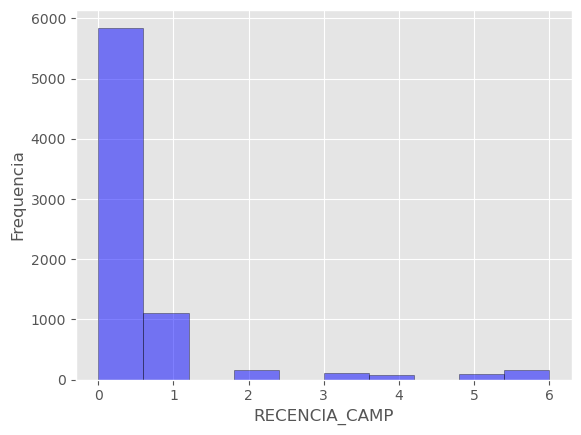

In [15]:
# Histograma

num_bins = 10
col = 'RECENCIA_CAMP'

plt.hist(data[col], num_bins, facecolor='blue', alpha=0.5, ec='k')

plt.xlabel(col)
plt.ylabel('Frequencia')
plt.show()

### Categórica

In [16]:
# Datos perdidos

data['SEXO'] = np.where(data['SEXO'] == '0', np.nan, data['SEXO'])
data['SIT_LAB'] = np.where(data['SIT_LAB'] == '0', np.nan, data['SIT_LAB'])
data['DEPARTAMENTO'] = np.where(data['DEPARTAMENTO'] == 'SIN_INFO', np.nan, data['DEPARTAMENTO'])

# Datos incosistentes

data['DEPARTAMENTO'] = np.where(data['DEPARTAMENTO'] == 'HU?NUCO', 'HUANUCO', data['DEPARTAMENTO'])
data['DEPARTAMENTO'] = np.where(data['DEPARTAMENTO'] == 'JUN?N', 'JUNIN', data['DEPARTAMENTO'])
data['DEPARTAMENTO'] = np.where(data['DEPARTAMENTO'] == 'SAN MART?N', 'SAN MARTIN', data['DEPARTAMENTO'])


In [17]:
# Descripción estadística categórica

resumen_cat = data[inputs_cat].describe(include='all').T
resumen_cat['miss'] = (1 - (resumen_cat['count'] / data.shape[0]))

In [18]:
resumen_cat

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,miss
TIPO_FLUJO_TC,7928,7,FAST1,4170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
SEXO,7927,2,M,4549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000126
SIT_LAB,7905,3,INDEPENDIENTE,3142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002901
DEPARTAMENTO,7927,25,LIMA,4501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000126
FLG_SEGURO,7928.0,NaN,NaN,NaN,0.088295,0.283741,0.0,0.0,0.0,0.0,1.0,0.0
CLI_AHOCRED,7928.0,NaN,NaN,NaN,0.002523,0.050166,0.0,0.0,0.0,0.0,1.0,0.0
CLI_CTS,7928.0,NaN,NaN,NaN,0.147326,0.354453,0.0,0.0,0.0,0.0,1.0,0.0
CLI_FM,7928.0,NaN,NaN,NaN,0.035696,0.185543,0.0,0.0,0.0,0.0,1.0,0.0
CLI_MILL,7928.0,NaN,NaN,NaN,0.118567,0.323299,0.0,0.0,0.0,0.0,1.0,0.0
CLI_PLA,7928.0,NaN,NaN,NaN,0.193996,0.395451,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
def unique_values(data, cols, normalize=True):
    for col in cols:
        print('-'*30)
        print(data[col].value_counts(normalize=normalize).sort_values(ascending=False))

In [20]:
# unique_values(data, inputs_cat)
unique_values(data, inputs_cat)

------------------------------
FAST1      0.525984
100APRO    0.149723
REG1       0.145182
REG2       0.072906
REG        0.066599
FAST2      0.038093
FAST       0.001514
Name: TIPO_FLUJO_TC, dtype: float64
------------------------------
M    0.573861
F    0.426139
Name: SEXO, dtype: float64
------------------------------
INDEPENDIENTE    0.397470
DEPENDIENTE      0.334978
MIXTO            0.267552
Name: SIT_LAB, dtype: float64
------------------------------
LIMA             0.567806
AREQUIPA         0.055002
LA LIBERTAD      0.049199
CALLAO           0.042639
PIURA            0.036079
ICA              0.035322
CUSCO            0.026492
LAMBAYEQUE       0.025609
JUNIN            0.024221
PUNO             0.019049
ANCASH           0.017661
CAJAMARCA        0.016526
LORETO           0.013372
TACNA            0.012111
SAN MARTIN       0.010218
AYACUCHO         0.009714
UCAYALI          0.009587
MOQUEGUA         0.007317
HUANUCO          0.006686
TUMBES           0.006055
APURIMAC         

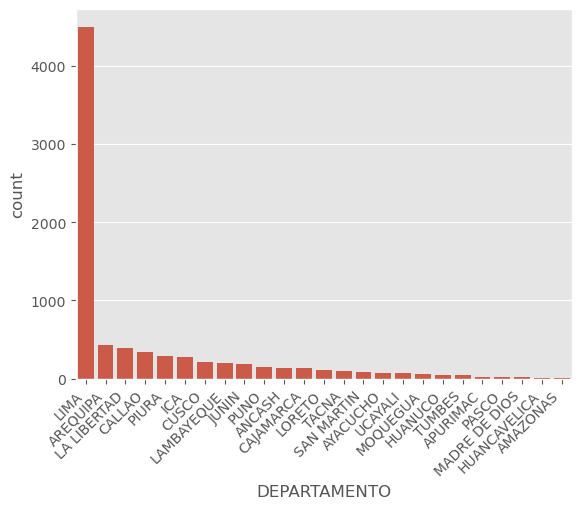

In [21]:
# Countplot
col = 'DEPARTAMENTO'

sns.countplot(data=data, x=col, color='C0', order=data[col].value_counts().index)
plt.xticks(rotation=45, ha='right')

plt.show()

In [22]:
# Variable numérica (pocos valores únicos)

data[col].value_counts().sort_values(ascending=False)
# data[col].value_counts(normalize=True).sort_index()

LIMA             4501
AREQUIPA          436
LA LIBERTAD       390
CALLAO            338
PIURA             286
ICA               280
CUSCO             210
LAMBAYEQUE        203
JUNIN             192
PUNO              151
ANCASH            140
CAJAMARCA         131
LORETO            106
TACNA              96
SAN MARTIN         81
AYACUCHO           77
UCAYALI            76
MOQUEGUA           58
HUANUCO            53
TUMBES             48
APURIMAC           26
PASCO              20
MADRE DE DIOS      19
HUANCAVELICA        7
AMAZONAS            2
Name: DEPARTAMENTO, dtype: int64

### Resumen 1

El dataset contiene datos de clientes del banco PeruaniBank, con un total de 15,743 registros y 57 columnas. Luego de seleccionar la población objetivo, este se redució a 7,928 registros.

La data tenía inconsistencia como departamento con valor `SIN_INFO`, sexo con valor `0` o 'SIT_LAB' con valor `0`. 


Las variables numéricas son 37 y las categóricas 17.

## Correlación, pruebas, normalidad, missing values, outliers

### Numérica

In [23]:
# Correlación

inputs_eval = ['EDAD', 'INGRESO_BRUTO', 'LINEA_TC', 'CAMP_TOT']

data_corr = data[inputs_eval].corr()
data_corr

,EDAD,INGRESO_BRUTO,LINEA_TC,CAMP_TOT
EDAD,1.000000,0.152755,0.177287,0.003734
INGRESO_BRUTO,0.152755,1.000000,0.837320,0.124568
LINEA_TC,0.177287,0.837320,1.000000,0.191572
CAMP_TOT,0.003734,0.124568,0.191572,1.000000


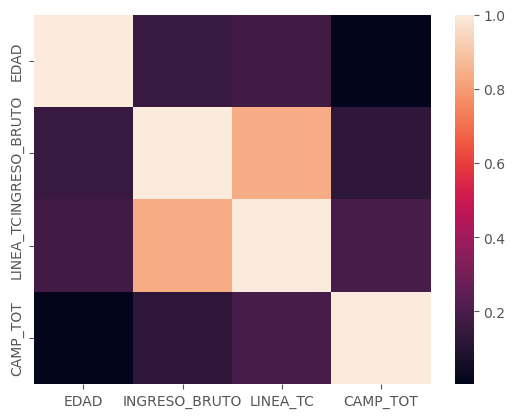

In [24]:
# Heatmap de correlación

sns.heatmap(data_corr)
plt.show()

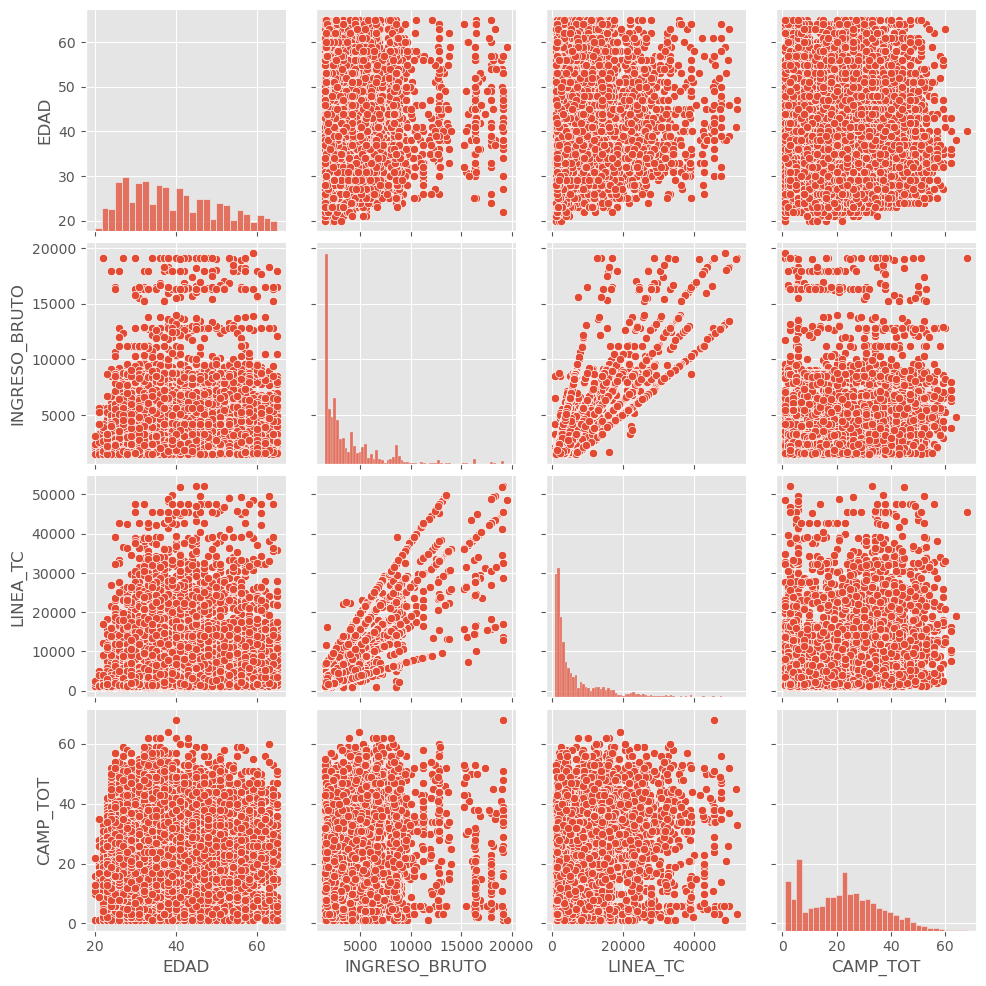

In [25]:
# Scatter general

sns.pairplot(data[inputs_eval])

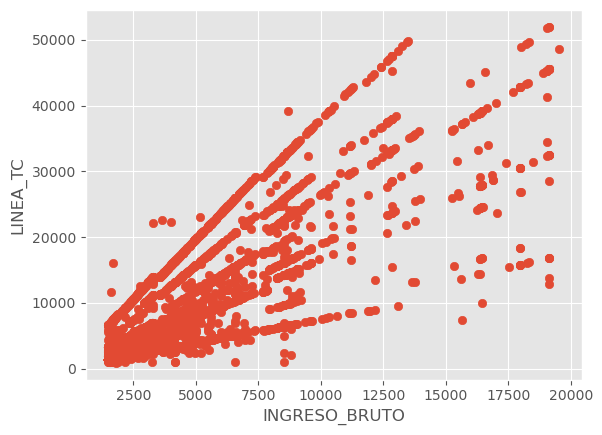

In [26]:
# Scatter específico

col1 = 'INGRESO_BRUTO'
col2 = 'LINEA_TC'

plt.scatter(x=col1, y=col2, data=data)

plt.xlabel(col1)
plt.ylabel(col2)
plt.show()

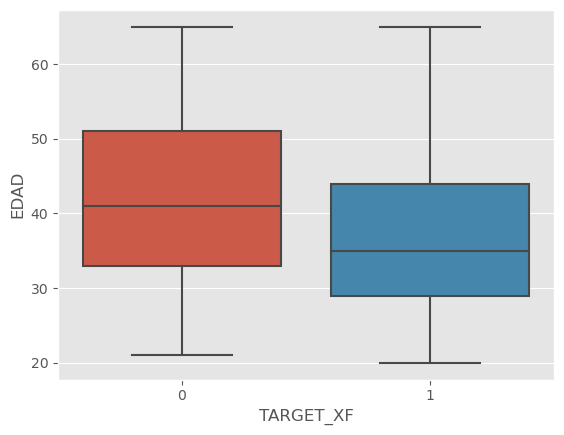

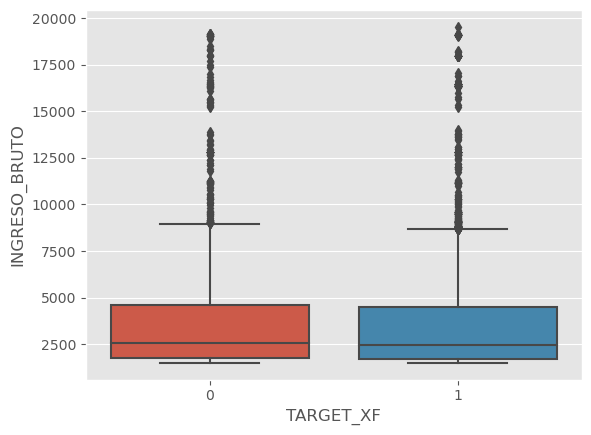

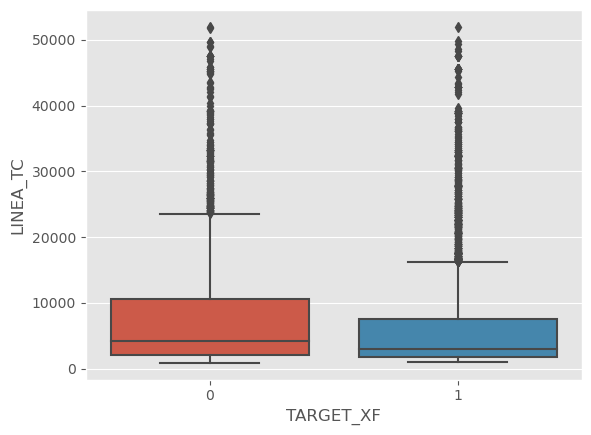

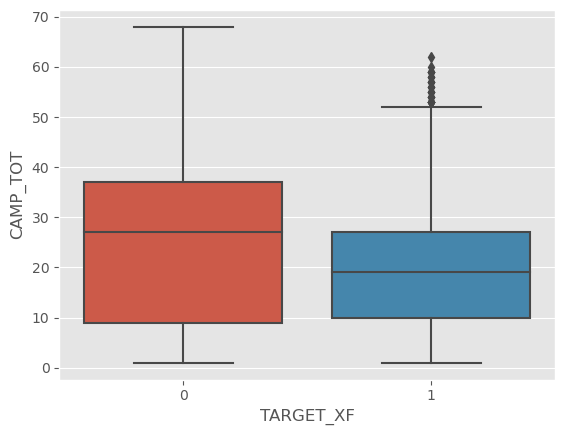

In [27]:
# Boxplot general

for col in inputs_eval:
    sns.boxplot(x=data['TARGET_XF'], y=data[col])
    plt.show()

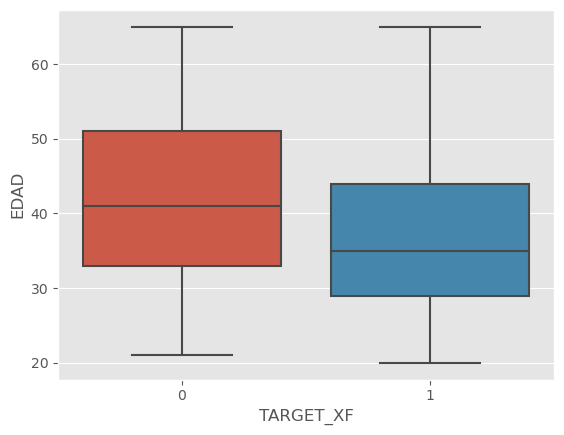

In [28]:
# Boxplot específico
col1 = 'TARGET_XF'      # cualitativa
col2 = 'EDAD'           # cuantitativa

sns.boxplot(x=data[col1], y=data[col2])
plt.show()

In [29]:
# Eliminar la variable 'LINEA_TARJETA' pues esta altamente correlacionada con INGRESO_BRUTO
data.drop(['LINEA_TC'], axis=1, inplace=True)

In [30]:
# Variables numéricas

inputs_num = ['INGRESO_BRUTO',              # Riesgo crediticio
              'EDAD',                                   # Socio demográfica
              'NRO_PAS_PBK',                            # PeruaniBank
              'EMP_REP_TC_SF', 'EMP_REP_PP_SF',         # RCC
              'EMP_REP_CONV_SF', 'EMP_REP_VEH_SF', 
              'EMP_REP_HIP_SF', 'SALDO_TC_SF', 
              'SALDO_PP_SF', 'SALDO_CONV_SF',
              'SALDO_VEH_SF', 'SALDO_HIP_SF',       
              'SALDO_TCSF_UU6', 'MAX_SALDO_TCSF_U6',    # Derivadas
              'MIN_SALDO_TCSF_U6', 'MAX_LINEA_TCSF',
              'MIN_LINEA_TCSF', 'LINEA_TOT_TCSF', 
              'MAX_SALTC_SF_UM', 'MIN_SALTC_SF_UM',
              'SALDO_SF_UM', 'NRO_ENT_REP_TOT_U6',
              'NRO_ENT_REP_SAL_TOT_U6', 'PORC_ENT_REP_SAL',
              'NRO_ENT_REP_TOT_UM', 'NRO_ENT_REP_SAL_TOT_UM',
              'IND_MAXLIN_ING', 'IND_LINIBK_ING', 
              'IND_DEU_ING',
              'PROB_CONT', 'CAMP_TOT',                  # CRM
              'PROM_CAMP', 'RECENCIA_CAMP',
              'NRO_CAMP_TC', 'CAMP_TC_U6']

len(inputs_num)

36

In [31]:
# Descripción estadística numérica

resumen = data[inputs_num].describe().T

## Coeficiente de variacion (mean/std)*100
resumen['cv'] = resumen.iloc[:,2] / resumen.iloc[:,1] * 100

## Asimetria 3*(mean-median)/std
resumen['as'] = data[inputs_num].skew()
resumen['as2'] = skew(data[inputs_num])

# resumen['as'] = (3 * (resumen.iloc[:,1] - resumen.iloc[:,5]))/ resumen.iloc[:,2]

## Curtosis
resumen['cur'] = kurtosis(data[inputs_num])

## Missing
resumen['miss'] = (1 - (resumen['count'] / data.shape[0]))

## Unique
resumen['unique'] = data[inputs_num].nunique()

### Categórica

In [32]:
def crosstab(col1, col2, show_cross=False, show_efec=False, show_bar_efec=False):
    datacross = pd.crosstab(data[col1], data[col2])                 # Crosstab
    table = datacross.div(datacross.sum(1).astype(float), axis=0)   # Crosstab de Efectividad
    
    order = data[col1].value_counts(ascending=False).index
    
    if show_cross:
        print('-'*30)
        print('Crosstab')

        dataaux = datacross.copy()
        dataaux['count'] = datacross.sum(axis=1)
        print(dataaux.loc[order])

    if show_efec:
        print('-'*30)
        print('Efectividad')
        print(table.loc[order])
        
    if show_bar_efec:
        sns.countplot(data=data, x=col1, hue=col2, order=order)
        plt.xticks(rotation=45, ha='right')
        plt.show()

        table.loc[order].plot(kind='bar', stacked=True)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('percentage')
        plt.show()


In [33]:
inputs_cat

['TIPO_FLUJO_TC',
 'SEXO',
 'SIT_LAB',
 'DEPARTAMENTO',
 'FLG_SEGURO',
 'CLI_AHOCRED',
 'CLI_CTS',
 'CLI_FM',
 'CLI_MILL',
 'CLI_PLA',
 'CLI_TXS',
 'EMP_REP_PP_PBK',
 'EMP_REP_CONV_PBK',
 'EMP_REP_VEH_PBK',
 'EMP_REP_HIP_PBK',
 'CLF_SBS',
 'FLG_BANCARIZADO']

In [34]:
# Variable 'TARGET_XF'
unique_values(data, ['TARGET_XF'])

------------------------------
1    0.613143
0    0.386857
Name: TARGET_XF, dtype: float64


In [35]:
# Variable 'TIPO_FLUJO_TC'

unique_values(data, ['TIPO_FLUJO_TC'], normalize=False)

------------------------------
FAST1      4170
100APRO    1187
REG1       1151
REG2        578
REG         528
FAST2       302
FAST         12
Name: TIPO_FLUJO_TC, dtype: int64


------------------------------
Crosstab
TARGET_XF     0     1  count
FAST1      1597  2573   4170
100APRO     707   480   1187
REG1        409   742   1151
REG2        231   347    578
REG          44   484    528
FAST2        75   227    302
FAST          4     8     12


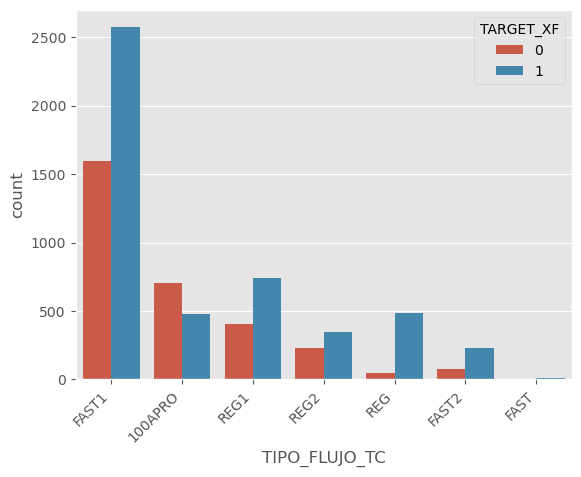

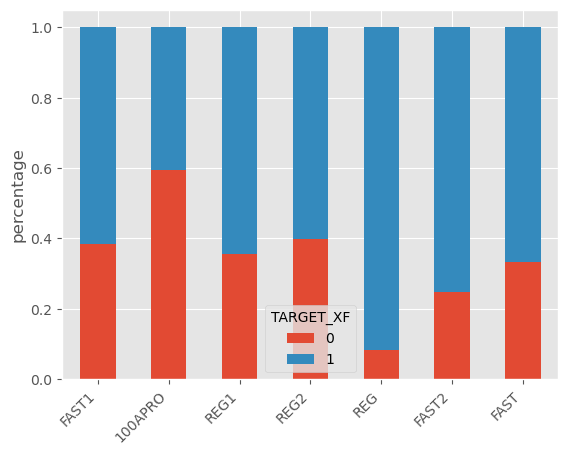

In [36]:
crosstab(col1='TIPO_FLUJO_TC', col2='TARGET_XF', show_cross=True, show_efec=False, show_bar_efec=True)

In [37]:
# Variable 'DEPARTAMENTO'

unique_values(data, ['DEPARTAMENTO'], normalize=False)

------------------------------
LIMA             4501
AREQUIPA          436
LA LIBERTAD       390
CALLAO            338
PIURA             286
ICA               280
CUSCO             210
LAMBAYEQUE        203
JUNIN             192
PUNO              151
ANCASH            140
CAJAMARCA         131
LORETO            106
TACNA              96
SAN MARTIN         81
AYACUCHO           77
UCAYALI            76
MOQUEGUA           58
HUANUCO            53
TUMBES             48
APURIMAC           26
PASCO              20
MADRE DE DIOS      19
HUANCAVELICA        7
AMAZONAS            2
Name: DEPARTAMENTO, dtype: int64


------------------------------
Crosstab
TARGET_XF         0     1  count
LIMA           1705  2796   4501
AREQUIPA        187   249    436
LA LIBERTAD     151   239    390
CALLAO           98   240    338
PIURA           135   151    286
ICA             123   157    280
CUSCO            85   125    210
LAMBAYEQUE       66   137    203
JUNIN            77   115    192
PUNO             67    84    151
ANCASH           64    76    140
CAJAMARCA        59    72    131
LORETO           18    88    106
TACNA            29    67     96
SAN MARTIN       24    57     81
AYACUCHO         40    37     77
UCAYALI          14    62     76
MOQUEGUA         44    14     58
HUANUCO           9    44     53
TUMBES           11    37     48
APURIMAC         25     1     26
PASCO            15     5     20
MADRE DE DIOS    12     7     19
HUANCAVELICA      6     1      7
AMAZONAS          2     0      2


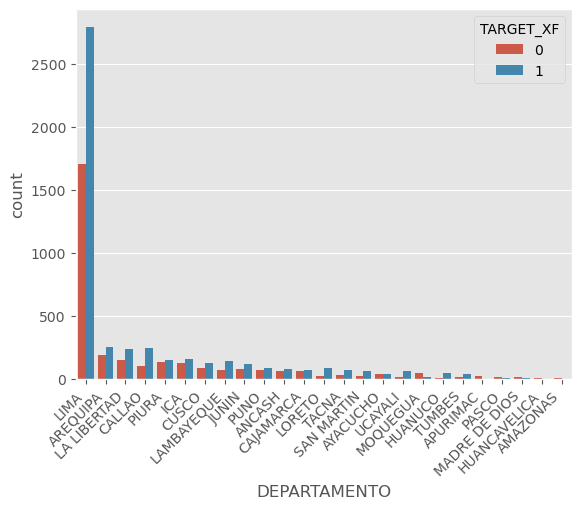

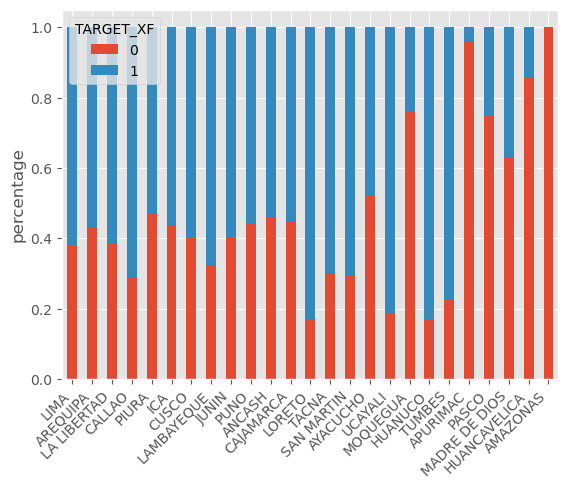

In [38]:
crosstab(col1='DEPARTAMENTO', col2='TARGET_XF', show_cross=True, show_efec=False, show_bar_efec=True)

In [39]:
# Variable 'DEPARTAMENTO'

unique_values(data, ['CLF_SBS'])

------------------------------
0.0    0.991989
1.0    0.008011
Name: CLF_SBS, dtype: float64


------------------------------
Crosstab
TARGET_XF     0     1  count
0.0        2410  4153   6563
1.0          18    35     53


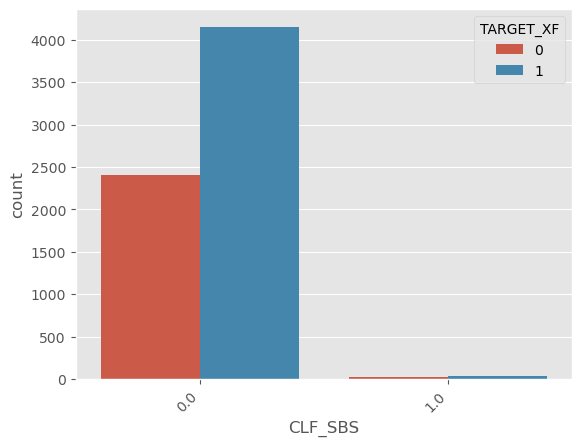

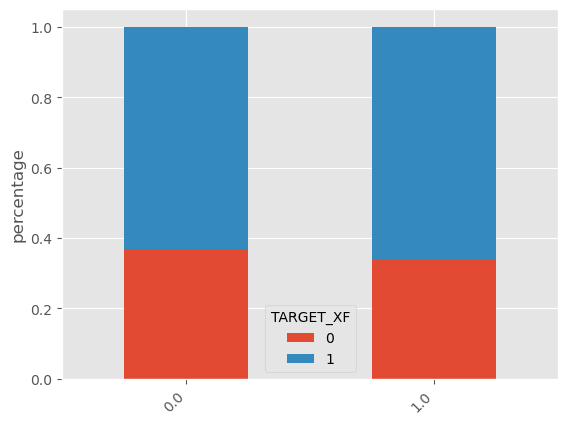

In [40]:
crosstab(col1='CLF_SBS', col2='TARGET_XF', show_cross=True, show_efec=False, show_bar_efec=True)

### Missing values

In [41]:
# Porcentaje de datos faltantes

# data.isna().sum().sort_values(ascending=False) * 100
data.isna().mean().sort_values(ascending=False) * 100

CLF_SBS                   16.548940
CAMP_TOT                   4.944501
RECENCIA_CAMP              4.944501
PROM_CAMP                  4.944501
SIT_LAB                    0.290111
SEXO                       0.012614
DEPARTAMENTO               0.012614
MIN_LINEA_TCSF             0.000000
MIN_SALTC_SF_UM            0.000000
MAX_SALTC_SF_UM            0.000000
LINEA_TOT_TCSF             0.000000
MES_CORTE                  0.000000
MAX_LINEA_TCSF             0.000000
MIN_SALDO_TCSF_U6          0.000000
NRO_ENT_REP_TOT_U6         0.000000
MAX_SALDO_TCSF_U6          0.000000
SALDO_TCSF_UU6             0.000000
SALDO_SF_UM                0.000000
NRO_ENT_REP_TOT_UM         0.000000
NRO_ENT_REP_SAL_TOT_U6     0.000000
PORC_ENT_REP_SAL           0.000000
SALDO_VEH_SF               0.000000
NRO_ENT_REP_SAL_TOT_UM     0.000000
IND_MAXLIN_ING             0.000000
IND_LINIBK_ING             0.000000
IND_DEU_ING                0.000000
PROB_CONT                  0.000000
NRO_CAMP_TC                0

In [42]:
inputs_missing_num = ['CAMP_TOT', 'RECENCIA_CAMP', 'PROM_CAMP']
# inputs_missing_cat = ['CLF_SBS', 'SIT_LAB', 'SEXO', 'DEPARTAMENTO']

In [43]:
# Variable 'CLF_SBS'
unique_values(data, ['CLF_SBS'])

------------------------------
0.0    0.991989
1.0    0.008011
Name: CLF_SBS, dtype: float64


In [44]:
# Asignación de la moda a la variable 'CLF_SBS'
data['CLF_SBS'] = data['CLF_SBS'].fillna(0.0)

unique_values(data, ['CLF_SBS'])

------------------------------
0.0    0.993315
1.0    0.006685
Name: CLF_SBS, dtype: float64


In [45]:
# Variables ['CAMP_TOT', 'RECENCIA_CAMP', 'PROM_CAMP']

unique_values(data, inputs_missing_num)

------------------------------
6.0     0.092887
1.0     0.033705
22.0    0.029459
26.0    0.028132
27.0    0.027601
          ...   
58.0    0.000929
62.0    0.000663
60.0    0.000531
64.0    0.000133
68.0    0.000133
Name: CAMP_TOT, Length: 63, dtype: float64
------------------------------
0.0    0.776141
1.0    0.147160
2.0    0.020568
6.0    0.020435
3.0    0.014862
5.0    0.011279
4.0    0.009554
Name: RECENCIA_CAMP, dtype: float64
------------------------------
1.000000     0.092887
0.166667     0.033705
3.666667     0.029459
4.333333     0.028132
4.500000     0.027601
               ...   
9.666667     0.000929
10.333333    0.000663
10.000000    0.000531
10.666667    0.000133
11.333333    0.000133
Name: PROM_CAMP, Length: 63, dtype: float64


In [46]:
resumen.loc[inputs_missing_num]

,count,mean,std,min,25%,50%,75%,max,cv,as,as2,cur,miss,unique
CAMP_TOT,7536.0,21.875531,13.554879,1.000000,10.000000,22.000000,31.000000,68.000000,61.963656,0.328182,NaN,NaN,0.049445,63
RECENCIA_CAMP,7536.0,0.450106,1.153814,0.000000,0.000000,0.000000,0.000000,6.000000,256.342566,3.425551,NaN,NaN,0.049445,7
PROM_CAMP,7536.0,3.645922,2.259146,0.166667,1.666667,3.666667,5.166667,11.333333,61.963656,0.328182,NaN,NaN,0.049445,63


In [47]:
import missingno as msno

<AxesSubplot:>

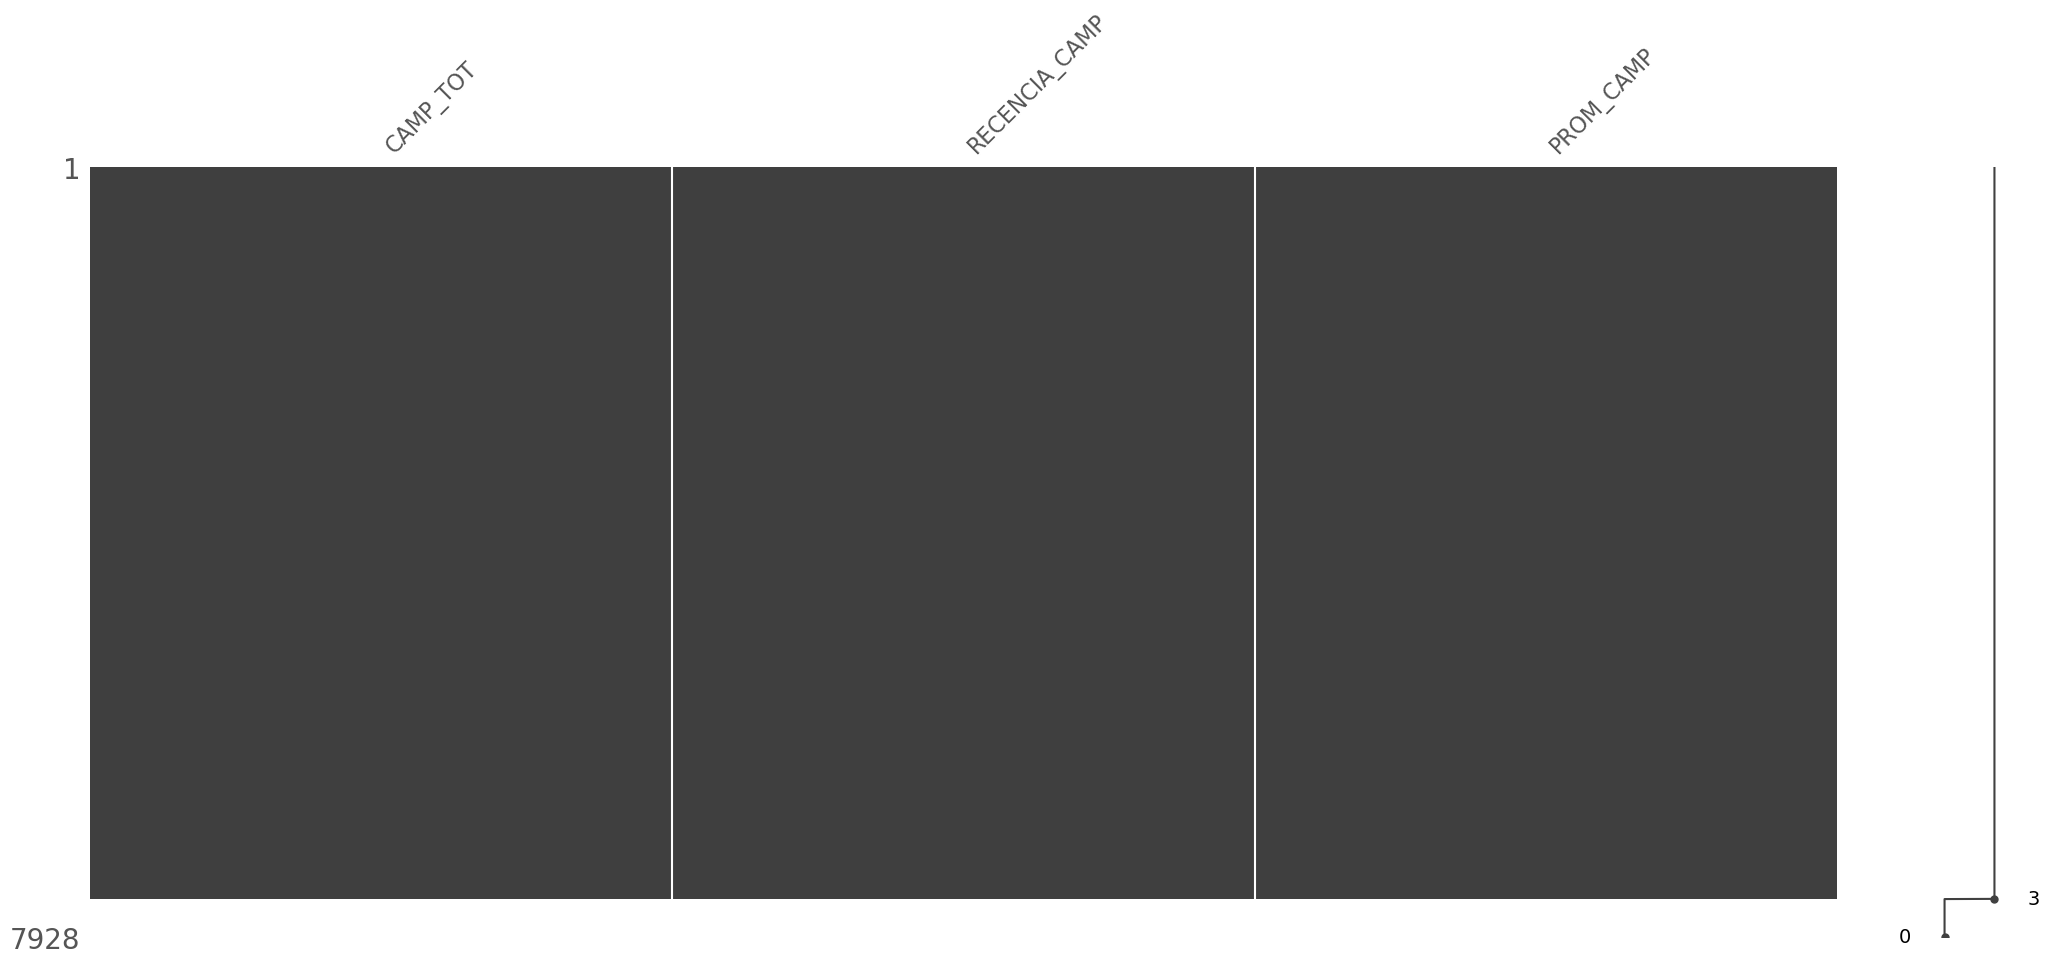

In [48]:
# Gráfico de matriz ordenado

datasort = data[inputs_missing_num].sort_values('CAMP_TOT')

msno.matrix(datasort)

<AxesSubplot:>

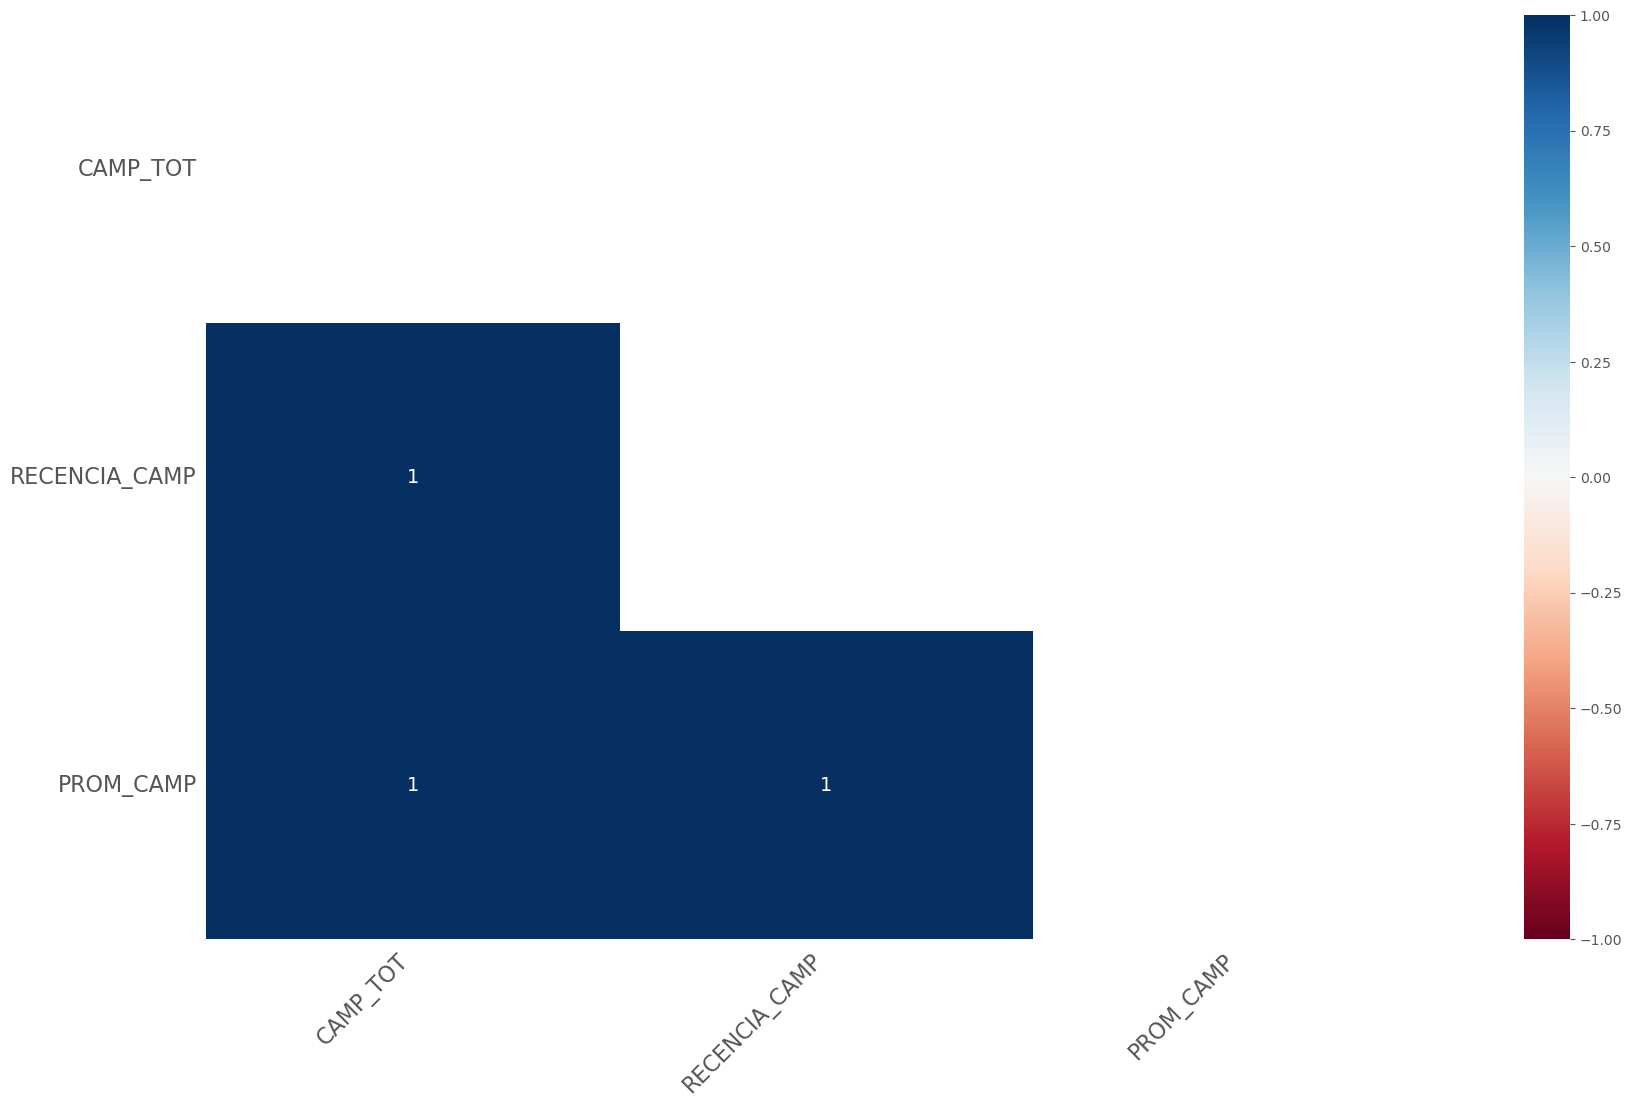

In [49]:
# Mapa de calor

msno.heatmap(data[inputs_missing_num])

In [50]:
# Asignación de la media a las variables 'CAMP_TOT' y 'PROM_CAMP'

data['CAMP_TOT'] = data['CAMP_TOT'].fillna(22)
data['PROM_CAMP'] = data['PROM_CAMP'].fillna(3.666667)

In [51]:
# Asignación de la moda a la variable 'RECENCIA_CAMP'
data['RECENCIA_CAMP'] = data['RECENCIA_CAMP'].fillna(0.0)

In [52]:
# Eliminación de registros donde poseea nan en variables ['SIT_LAB', 'SEXO', 'DEPARTAMENTO']

## Registros que posean nulos
datanull = data.isna()
datanullindex = datanull.sum(axis=1)
datanullrow = datanullindex.astype(bool)
datanullcount = datanullrow.sum()
(datanullcount/data.shape[0]) * 100

0.30272452068617556

In [53]:
data.dropna(inplace=True)

### Outliers

In [54]:
data.columns

Index(['MES_CORTE', 'ID', 'TIPO_FLUJO_TC', 'INGRESO_BRUTO', 'EDAD', 'SEXO',
       'SIT_LAB', 'DEPARTAMENTO', 'FLG_SEGURO', 'CLI_AHOCRED', 'CLI_CTS',
       'CLI_FM', 'CLI_MILL', 'CLI_PLA', 'CLI_TXS', 'NRO_PAS_PBK',
       'EMP_REP_PP_PBK', 'EMP_REP_CONV_PBK', 'EMP_REP_VEH_PBK',
       'EMP_REP_HIP_PBK', 'CLF_SBS', 'FLG_BANCARIZADO', 'EMP_REP_TC_SF',
       'EMP_REP_PP_SF', 'EMP_REP_CONV_SF', 'EMP_REP_VEH_SF', 'EMP_REP_HIP_SF',
       'SALDO_TC_SF', 'SALDO_PP_SF', 'SALDO_CONV_SF', 'SALDO_VEH_SF',
       'SALDO_HIP_SF', 'SALDO_TCSF_UU6', 'MAX_SALDO_TCSF_U6',
       'MIN_SALDO_TCSF_U6', 'MAX_LINEA_TCSF', 'MIN_LINEA_TCSF',
       'LINEA_TOT_TCSF', 'MAX_SALTC_SF_UM', 'MIN_SALTC_SF_UM', 'SALDO_SF_UM',
       'NRO_ENT_REP_TOT_U6', 'NRO_ENT_REP_SAL_TOT_U6', 'PORC_ENT_REP_SAL',
       'NRO_ENT_REP_TOT_UM', 'NRO_ENT_REP_SAL_TOT_UM', 'IND_MAXLIN_ING',
       'IND_LINIBK_ING', 'IND_DEU_ING', 'PROB_CONT', 'CAMP_TOT', 'PROM_CAMP',
       'RECENCIA_CAMP', 'NRO_CAMP_TC', 'CAMP_TC_U6', 'TARGET_XF'],
 

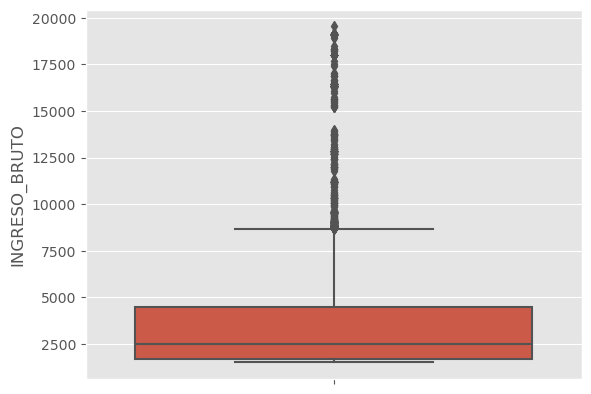

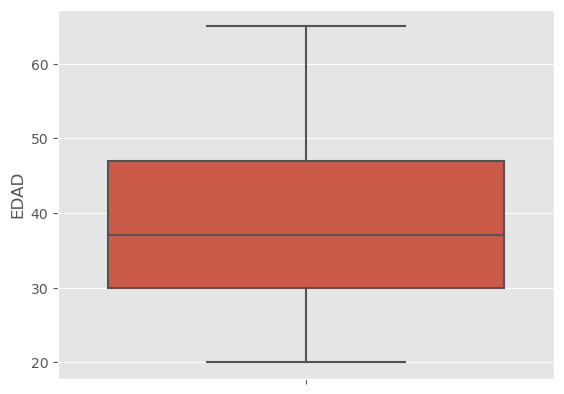

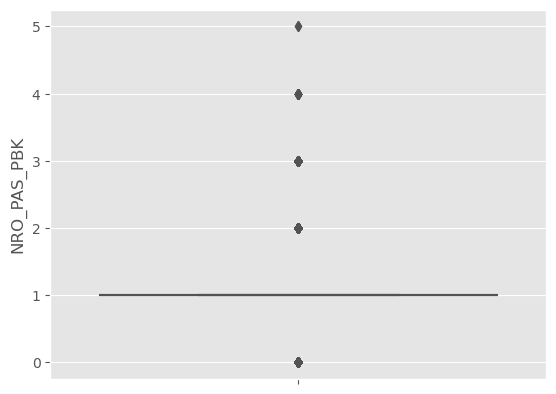

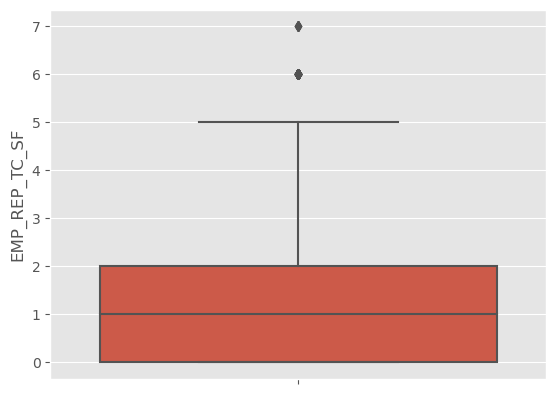

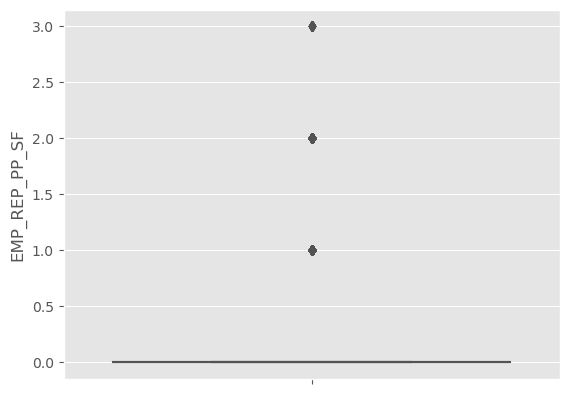

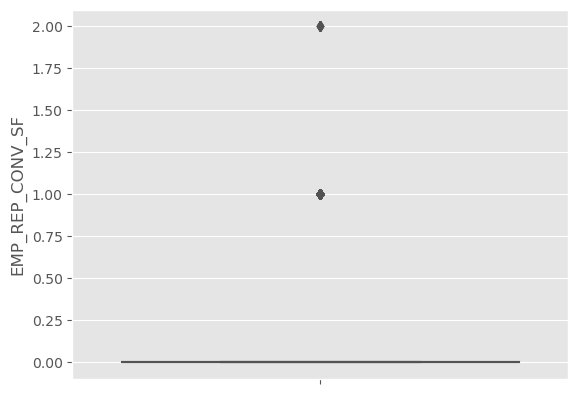

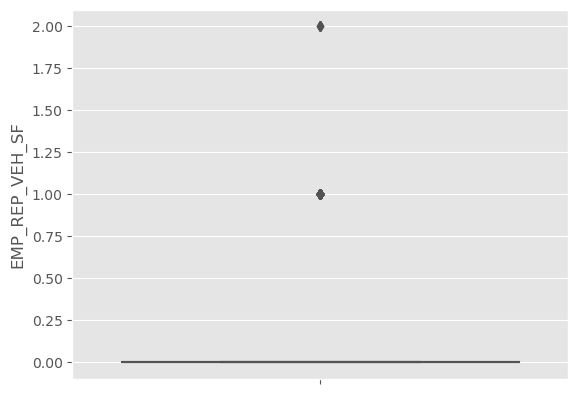

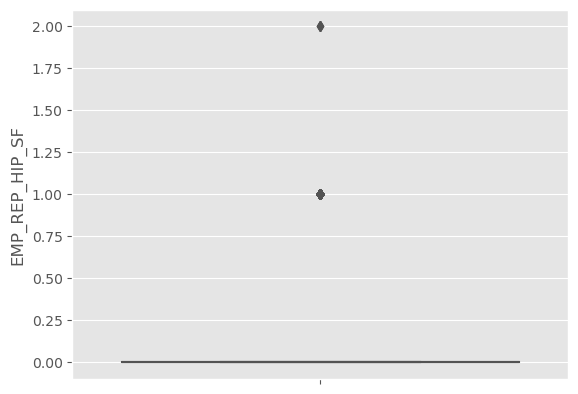

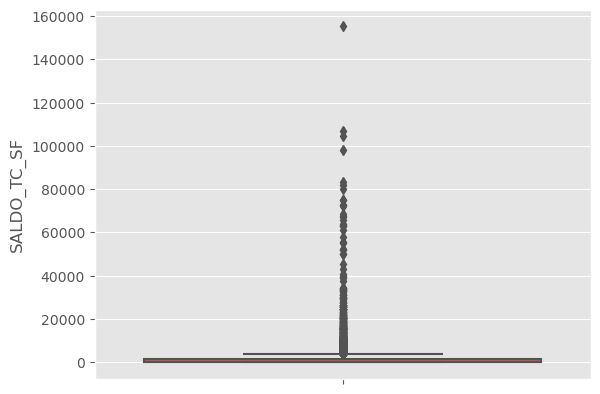

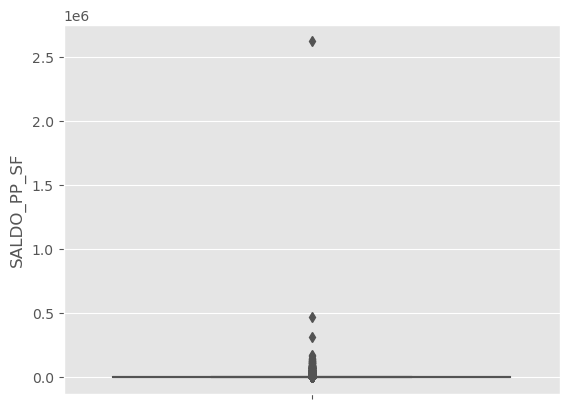

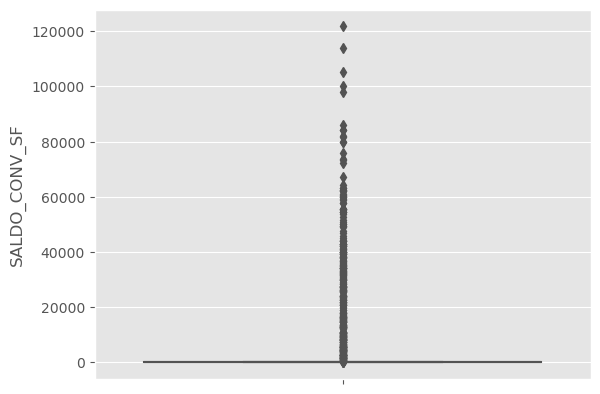

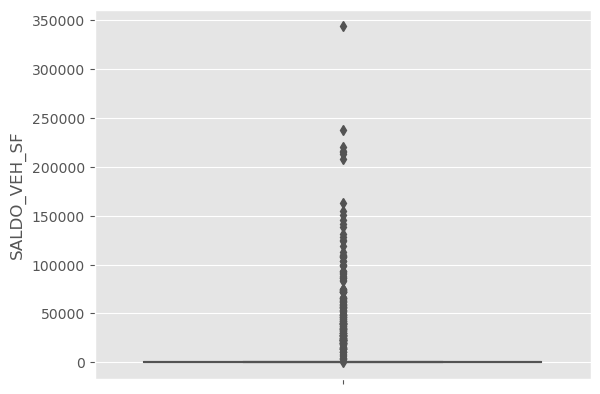

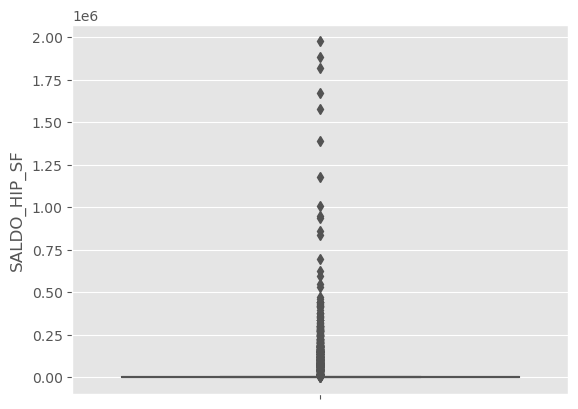

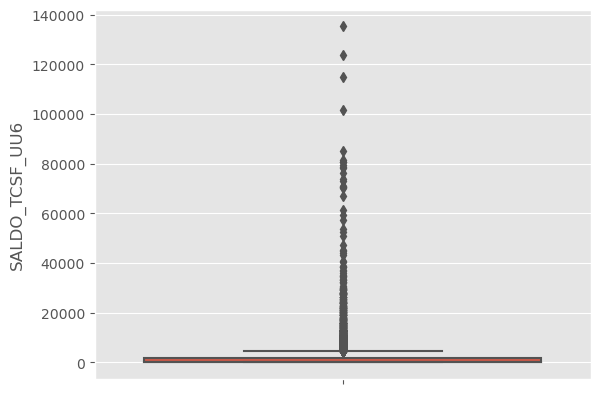

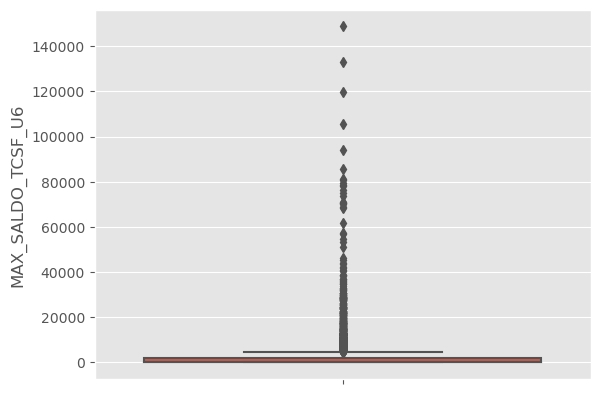

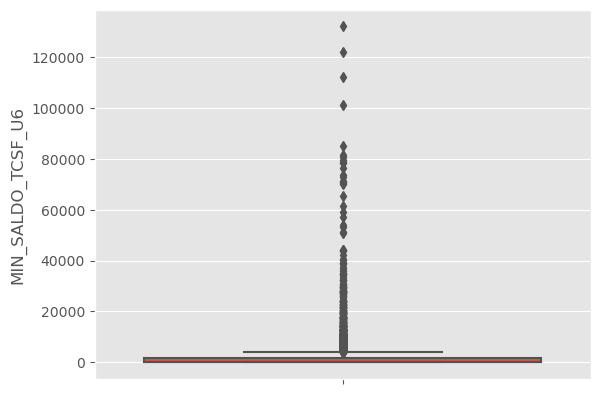

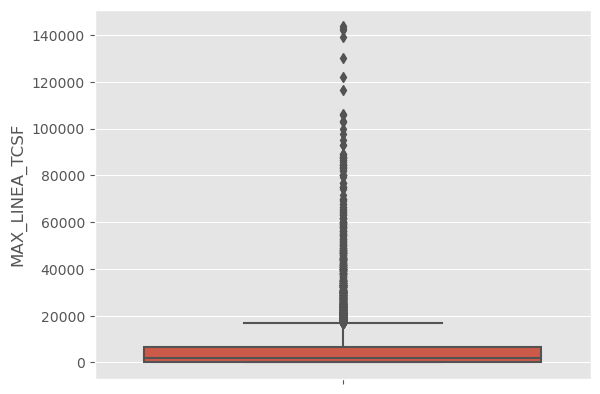

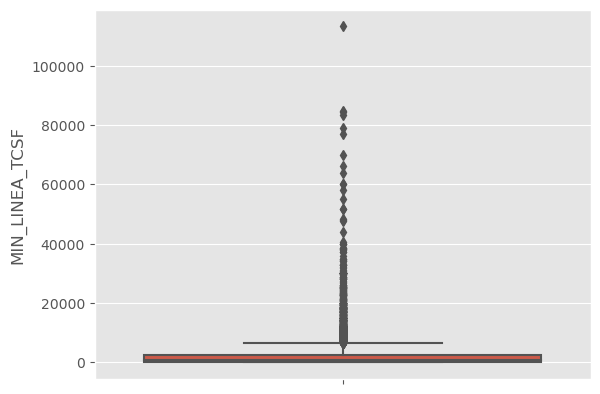

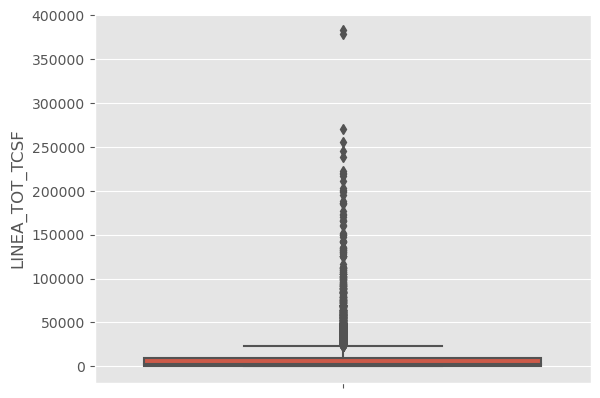

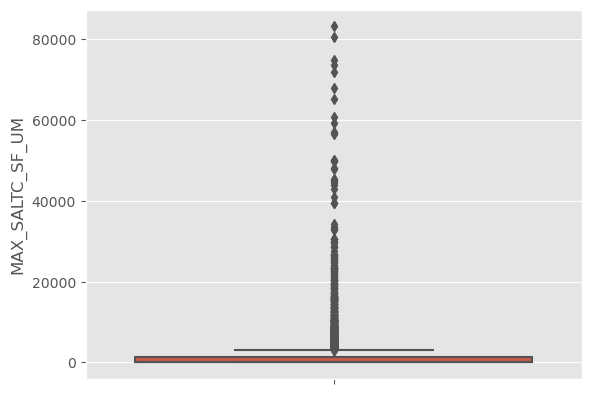

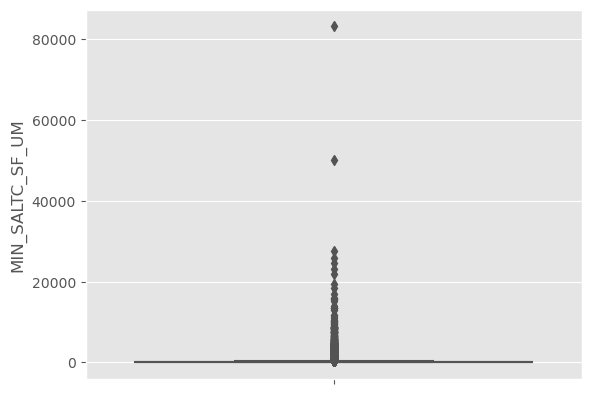

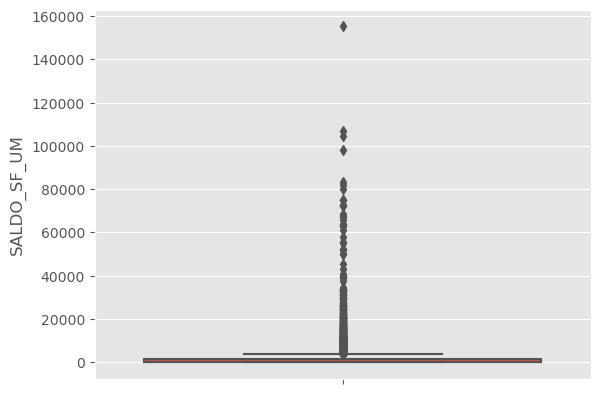

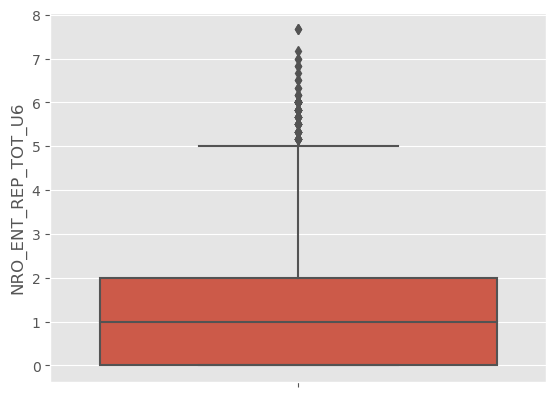

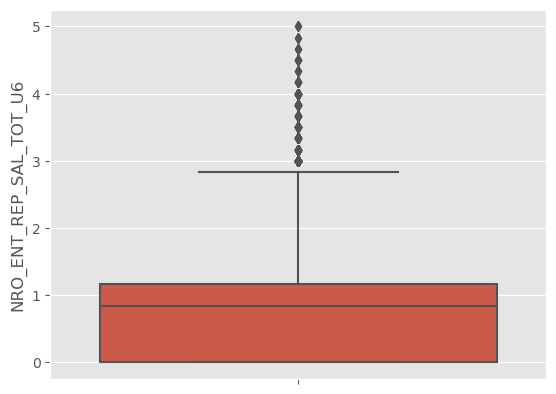

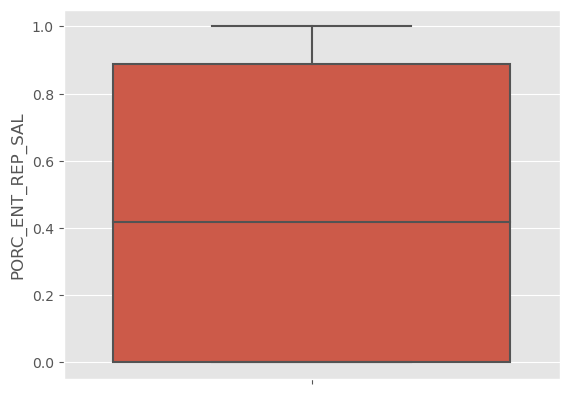

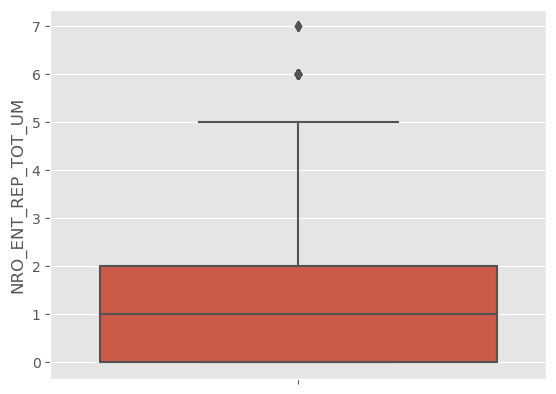

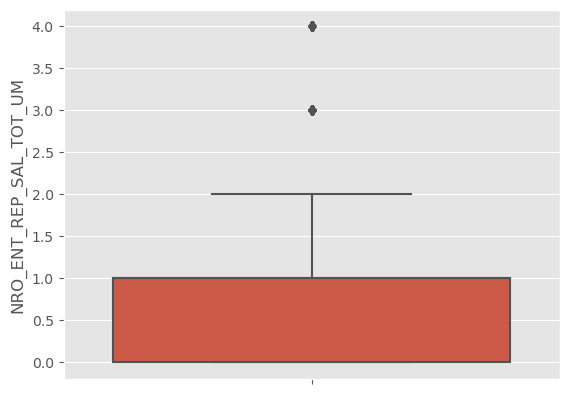

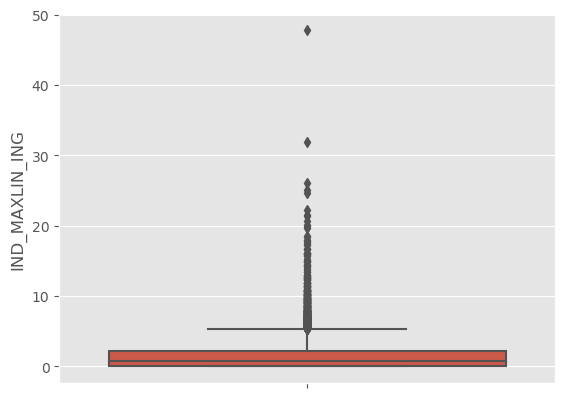

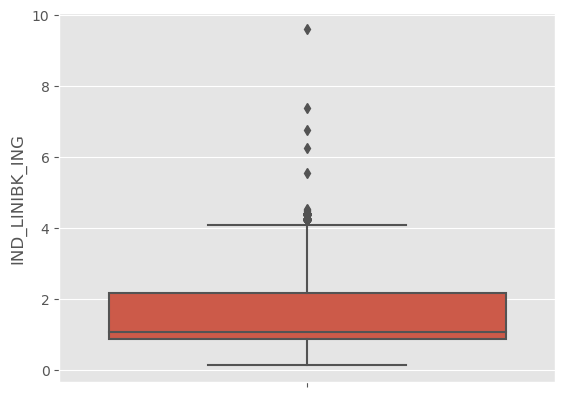

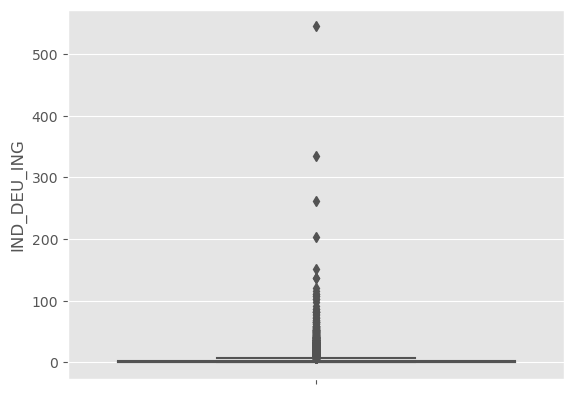

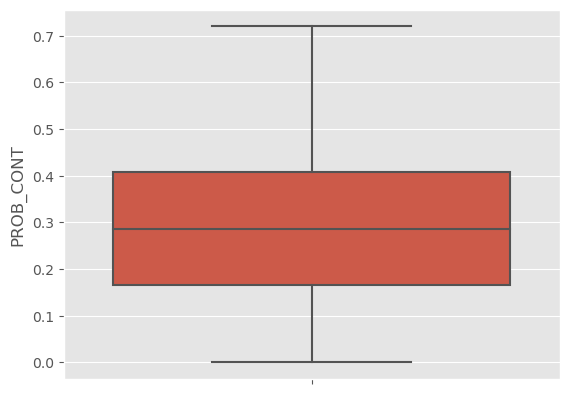

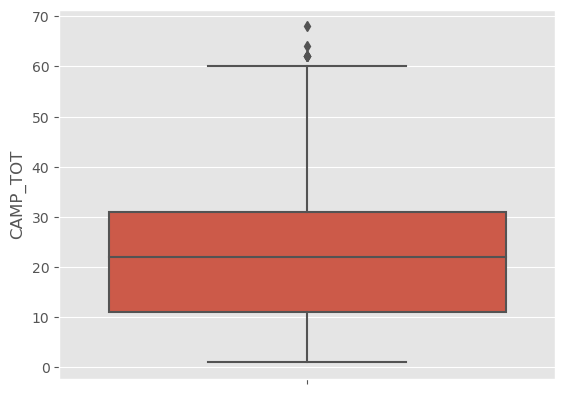

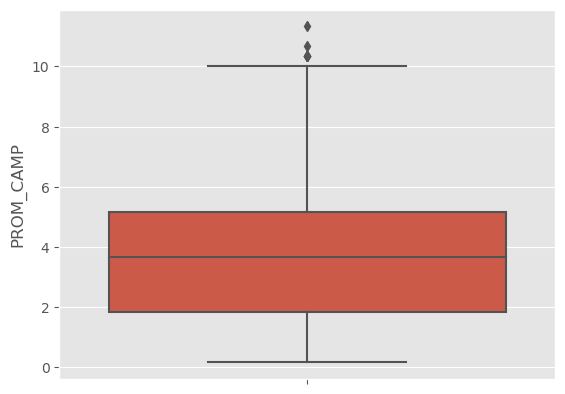

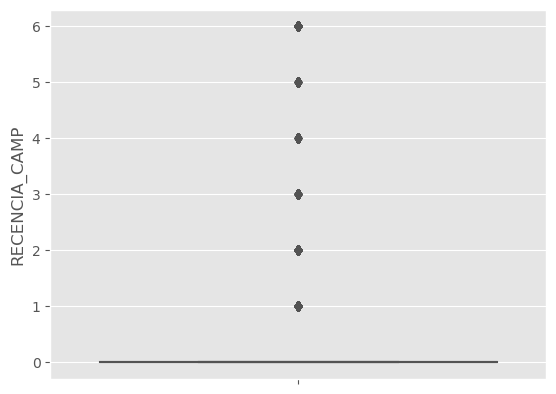

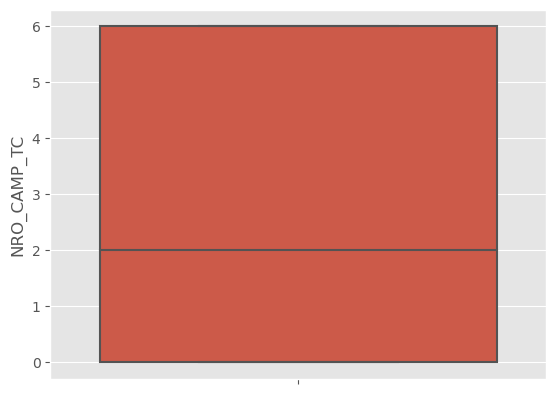

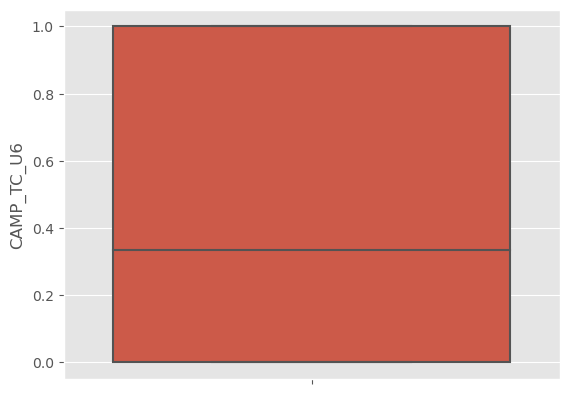

In [55]:
for col in inputs_num:
    sns.boxplot(y=data[col])
    plt.show()

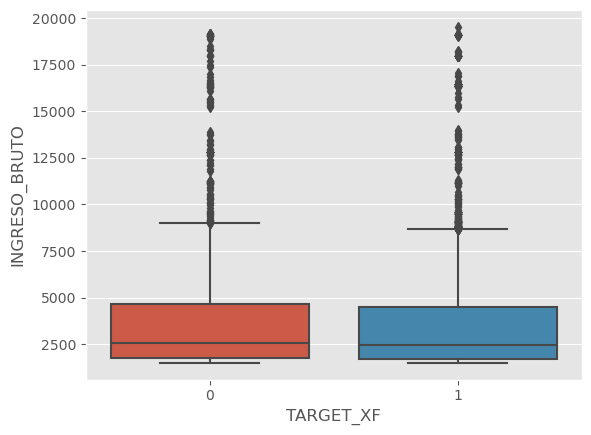

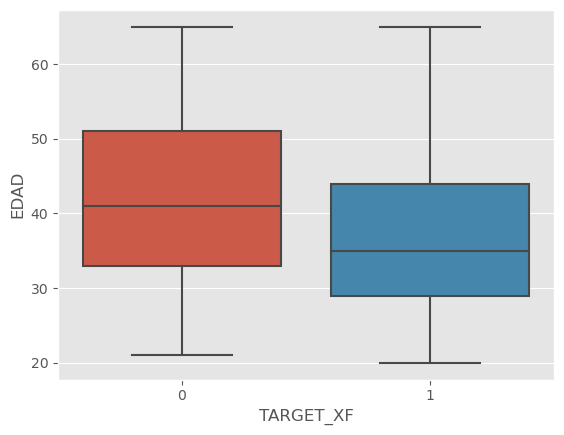

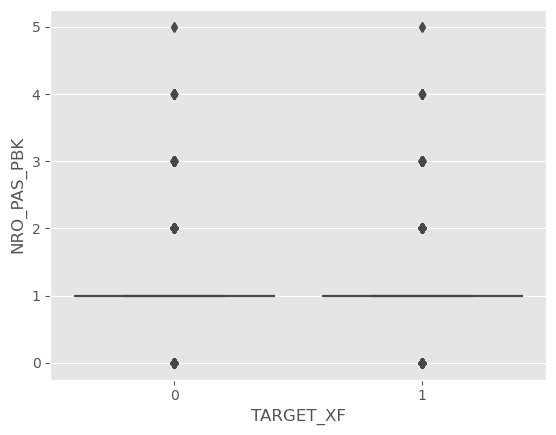

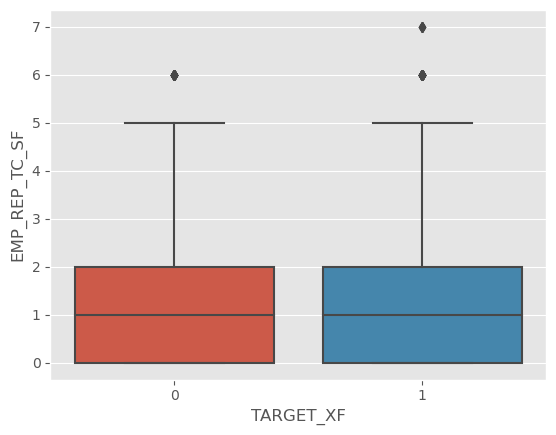

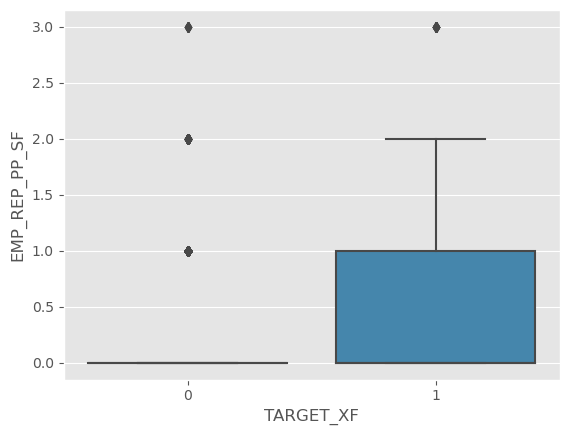

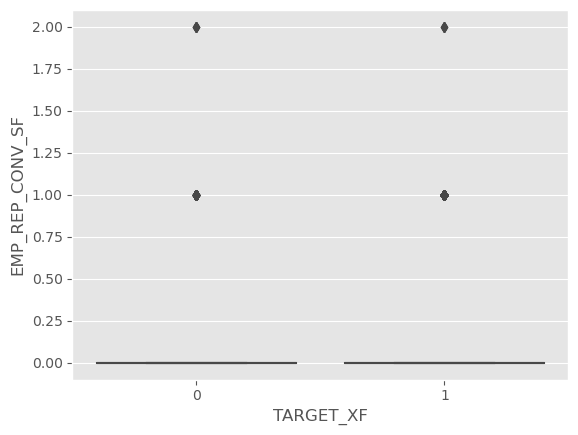

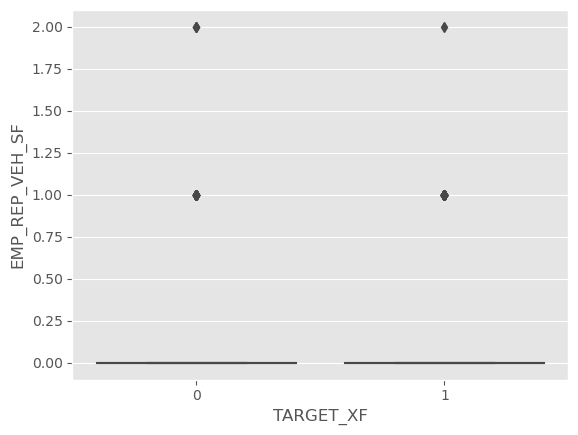

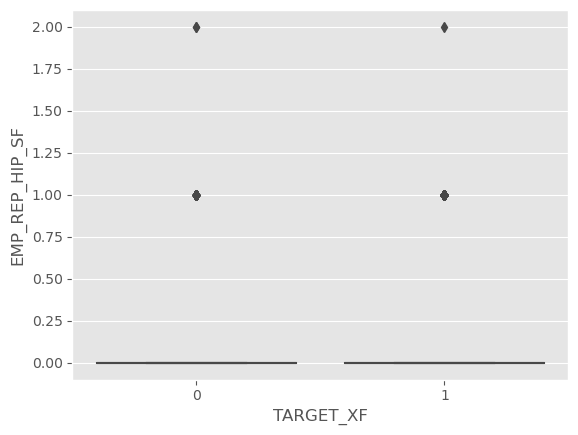

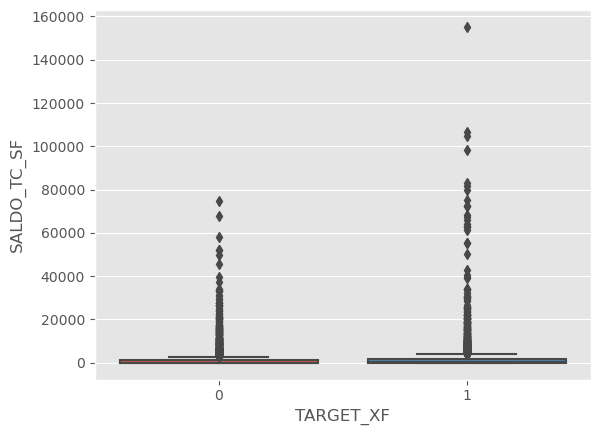

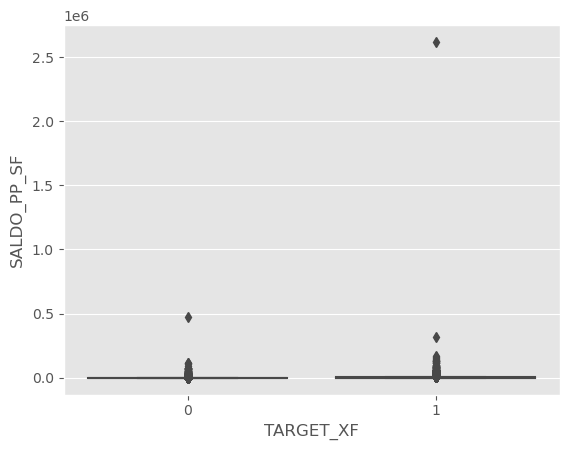

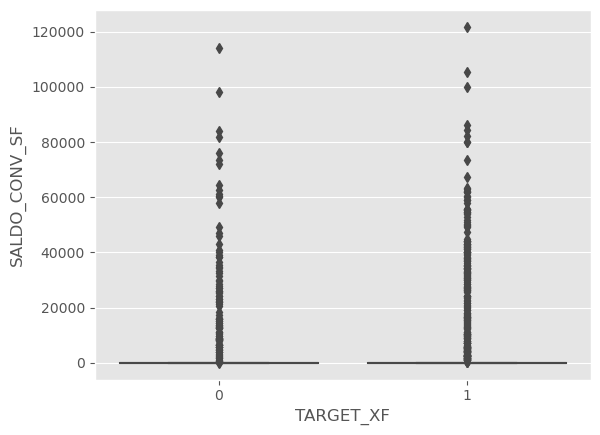

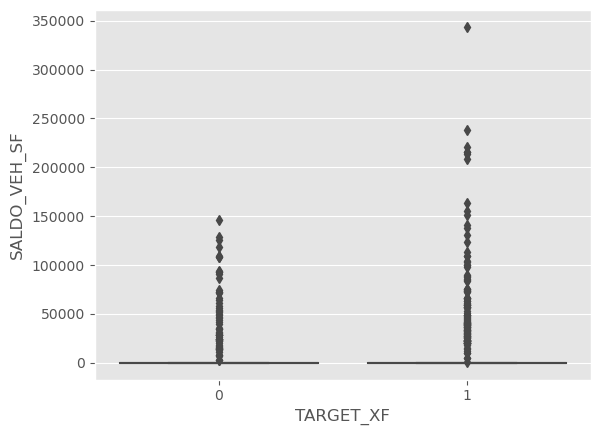

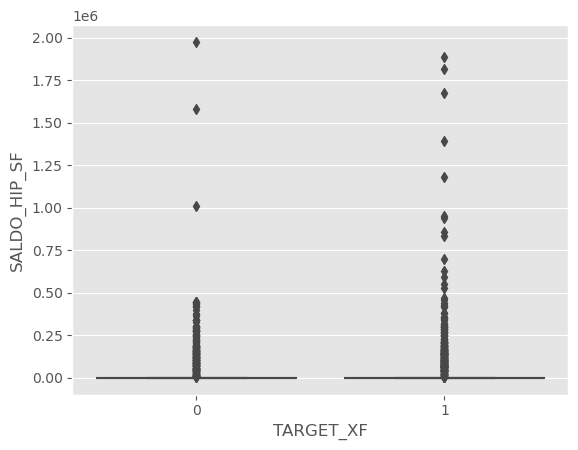

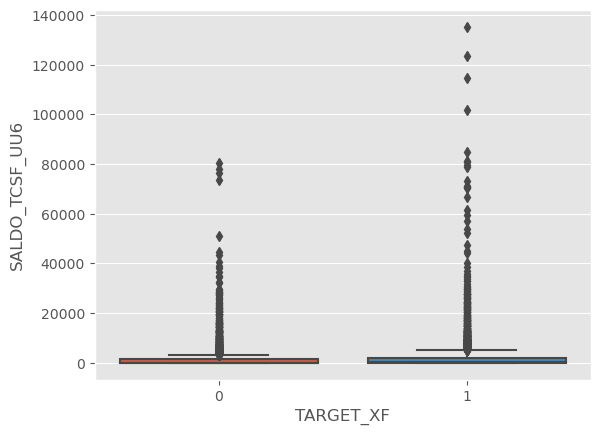

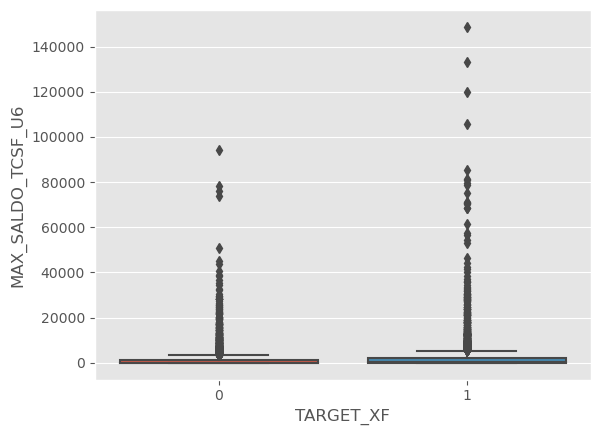

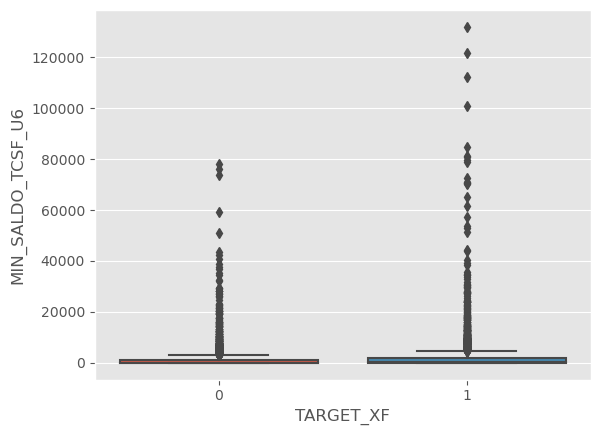

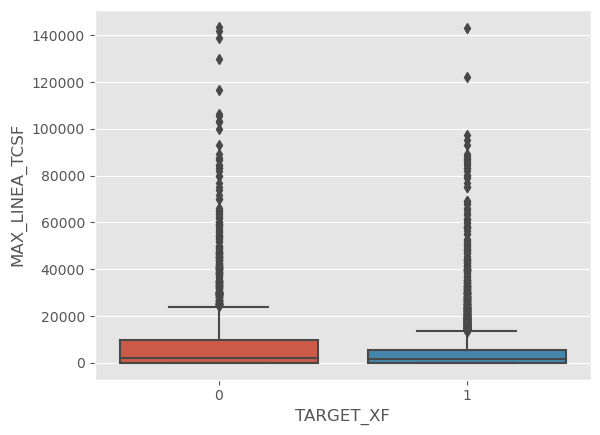

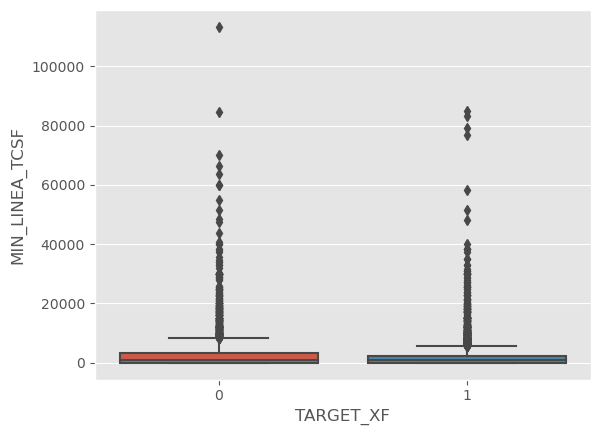

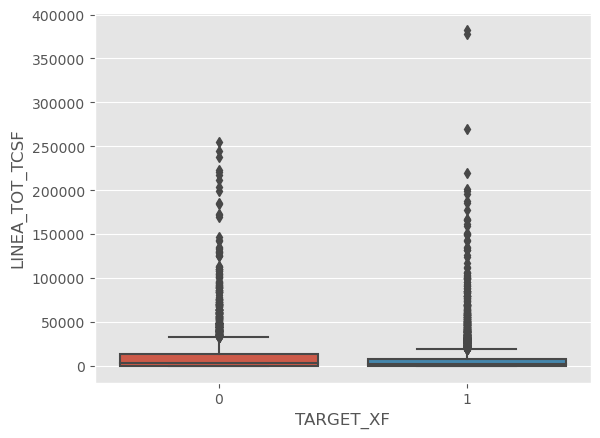

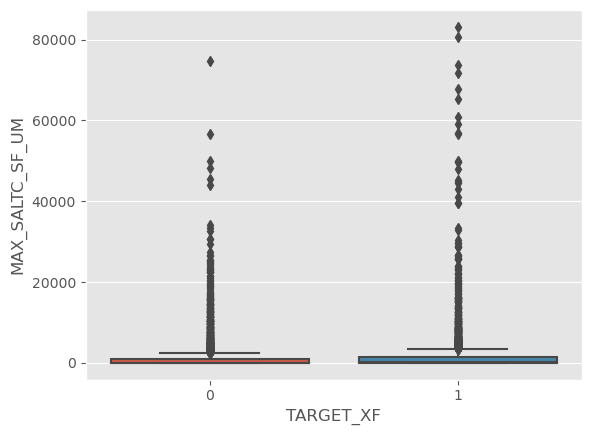

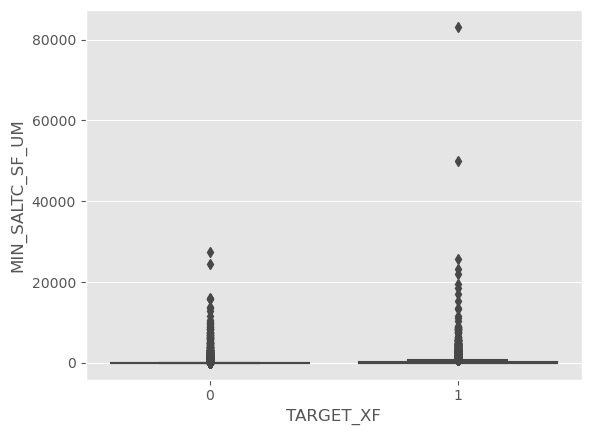

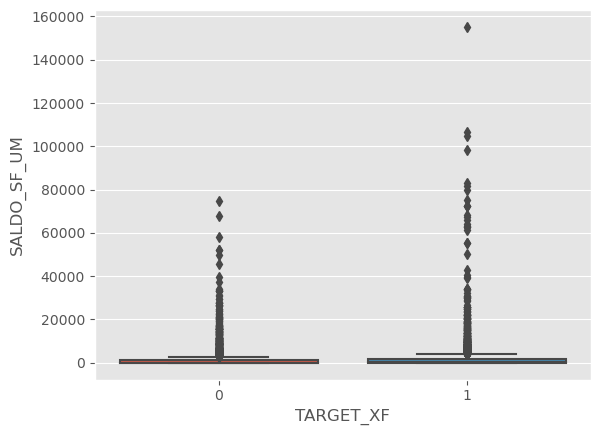

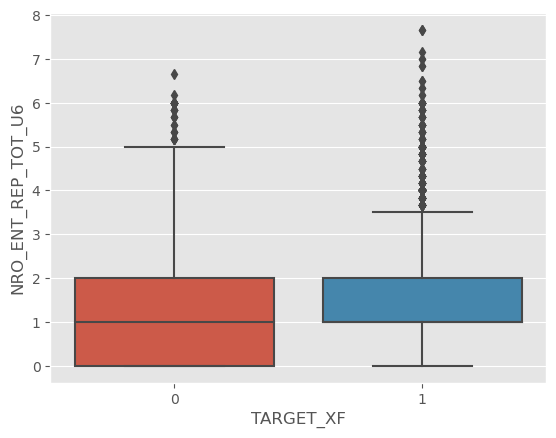

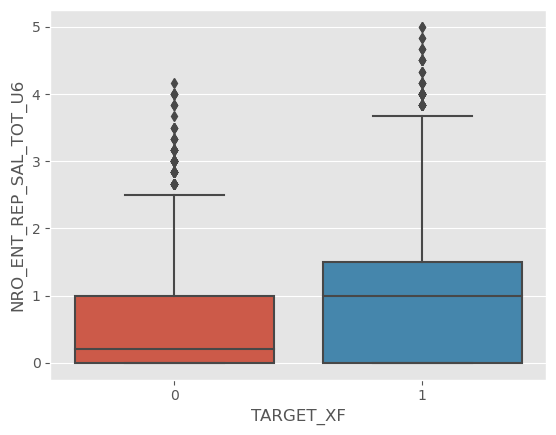

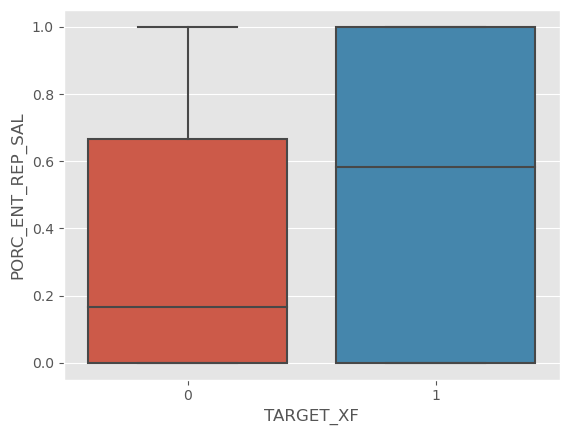

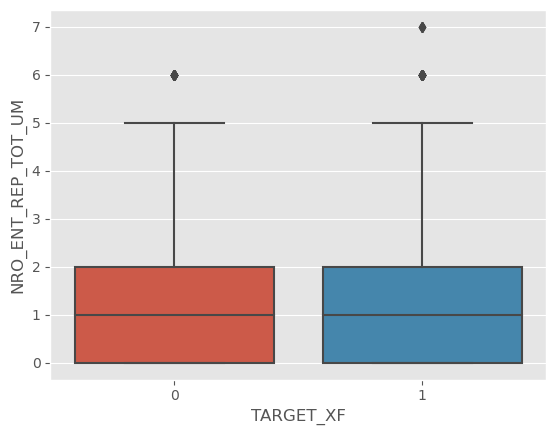

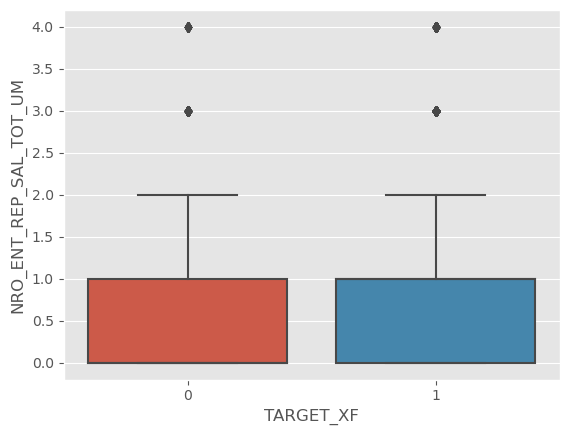

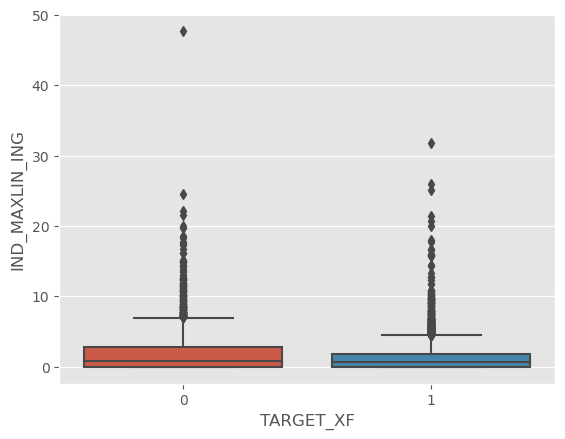

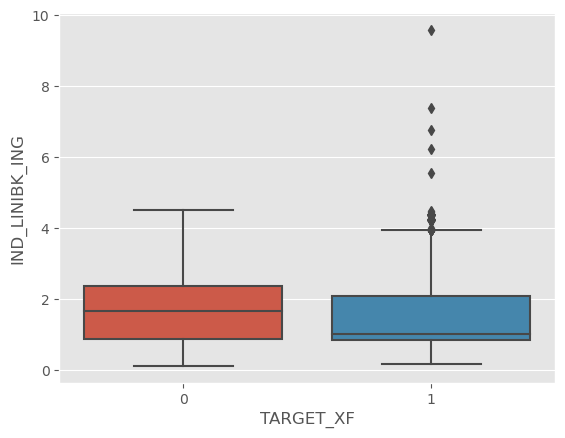

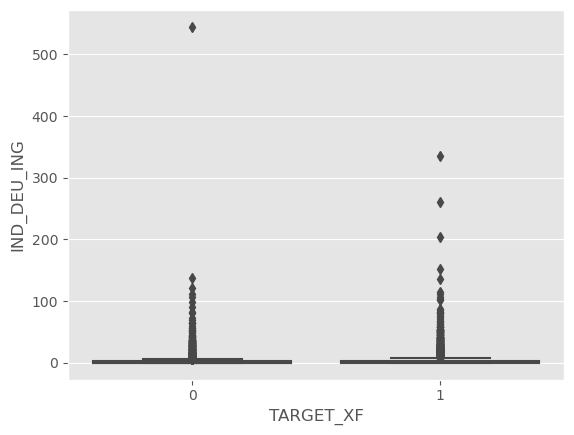

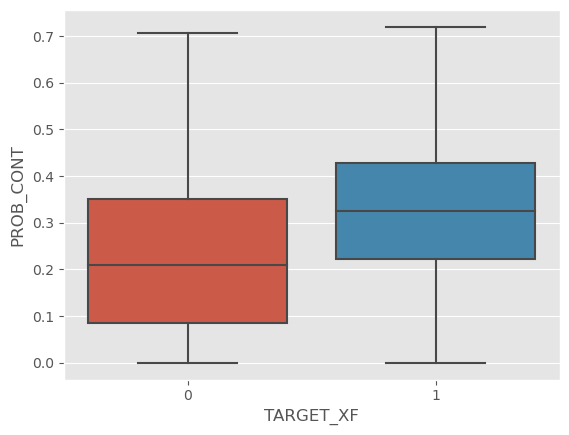

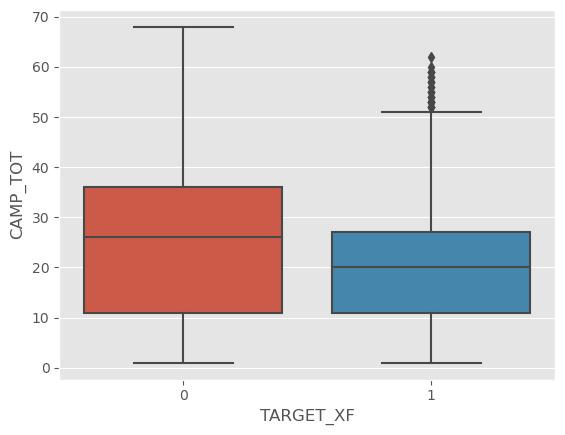

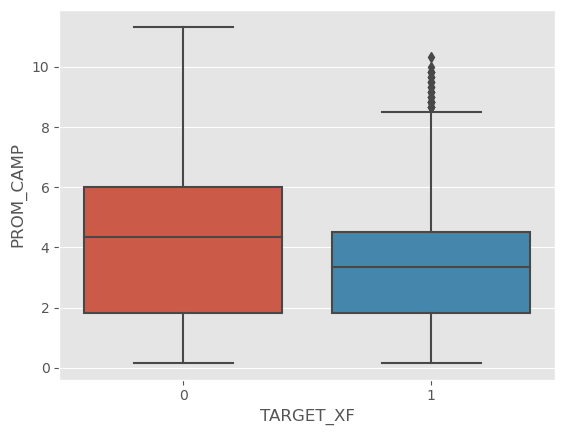

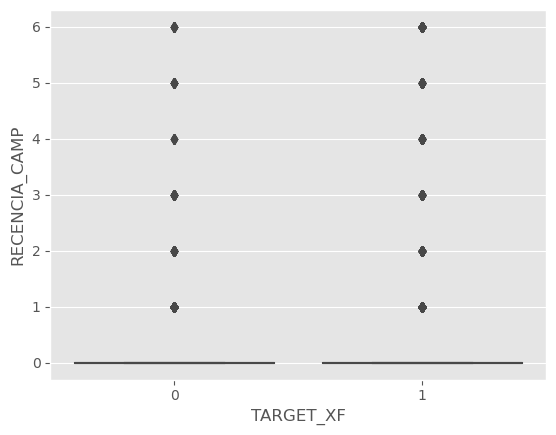

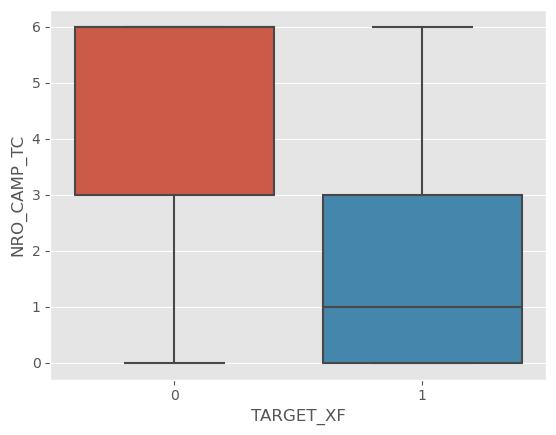

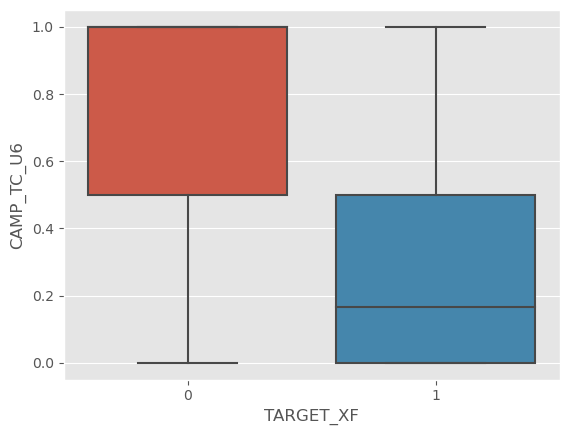

In [56]:
for col in inputs_num:
    sns.boxplot(x=data['TARGET_XF'], y=data[col])
    plt.show()

In [57]:
data.shape

(7904, 56)

### Resumen 2

* Se eliminó la variable `LINEA_TC` pues se correlaciona altamente con `INGRESO_BRUTO`.

* Para datos perdidos:

  - Se asignó la moda a la variable `CLF_SBS` porque la moda tiene el 99% de registros.

  - Se encontró que existe alta correlación de datos perdidos en las variables `CAMP_TOT`, `RECENCIA_CAMP`, `PROM_CAMP`.

  - Se asignó la mediana a las variables 
`CAMP_TOT` y `PROM_CAMP` porque siguen una distribución normal.

  - Se asingó la moda a la variable `RECENCIA_CAMP`, donde el 78% de registros tienen una recencia de 0.0.
  
  - Se eliminó registros donde presentan nulos en `SIT_LAB`, `SEXO` y `DEPARTAMENTO`, esto representa el 0.30%.

* Para los outliers, de forma visual se dectectó posibles valores atípicos en las variables `IND_MAXLIN_ING` y `IND_DEU_INF`, sin embargo, no se realizó ningun procesamiento.

* Se concluye con un dataset final de 7,904 registros de clientes y 56 variables.




## Feature engineering

### Criterios estadísticos

In [58]:
# Coeficiente de asimetría

inputs_num_sel = np.array(resumen[resumen['as'] <= 5].index)

print('initial columns:', len(inputs_num))
print('total columns:', len(inputs_num_sel))

initial columns: 36
total columns: 20


In [59]:
inputs_num_sel

array(['INGRESO_BRUTO', 'EDAD', 'NRO_PAS_PBK', 'EMP_REP_TC_SF',
       'EMP_REP_PP_SF', 'EMP_REP_HIP_SF', 'MAX_LINEA_TCSF',
       'NRO_ENT_REP_TOT_U6', 'NRO_ENT_REP_SAL_TOT_U6', 'PORC_ENT_REP_SAL',
       'NRO_ENT_REP_TOT_UM', 'NRO_ENT_REP_SAL_TOT_UM', 'IND_MAXLIN_ING',
       'IND_LINIBK_ING', 'PROB_CONT', 'CAMP_TOT', 'PROM_CAMP',
       'RECENCIA_CAMP', 'NRO_CAMP_TC', 'CAMP_TC_U6'], dtype=object)

In [60]:
# Coeficiente de variación

resumen_res_num = data[inputs_num_sel].describe()
resumen_res_num = resumen_res_num.transpose()
resumen_res_num['cv'] = resumen_res_num.iloc[:,2] / resumen_res_num.iloc[:,1] * 100
resumen_res_num

,count,mean,std,min,25%,50%,75%,max,cv
INGRESO_BRUTO,7904.0,3707.475076,2990.863737,1500.000000,1705.750000,2471.500000,4492.250000,19544.000000,80.671176
EDAD,7904.0,39.017586,11.059000,20.000000,30.000000,37.000000,47.000000,65.000000,28.343629
NRO_PAS_PBK,7904.0,1.151822,0.540854,0.000000,1.000000,1.000000,1.000000,5.000000,46.956435
EMP_REP_TC_SF,7904.0,1.401822,1.340339,0.000000,0.000000,1.000000,2.000000,7.000000,95.614095
EMP_REP_PP_SF,7904.0,0.254808,0.506920,0.000000,0.000000,0.000000,0.000000,3.000000,198.942194
EMP_REP_HIP_SF,7904.0,0.039727,0.197263,0.000000,0.000000,0.000000,0.000000,2.000000,496.548961
MAX_LINEA_TCSF,7904.0,6067.512544,11629.105109,0.000000,0.000000,2000.000000,6700.000000,143706.100000,191.661822
NRO_ENT_REP_TOT_U6,7904.0,1.420403,1.318414,0.000000,0.000000,1.000000,2.000000,7.666667,92.819678
NRO_ENT_REP_SAL_TOT_U6,7904.0,0.837610,0.900389,0.000000,0.000000,0.833333,1.166667,5.000000,107.495112
PORC_ENT_REP_SAL,7904.0,0.443922,0.411642,0.000000,0.000000,0.416667,0.888889,1.000000,92.728363


In [61]:
resumen_res_num['cv'].describe()

count     20.000000
mean     123.901056
std      104.979002
min       28.343629
25%       61.492187
50%       92.774020
75%      124.660631
max      496.548961
Name: cv, dtype: float64

In [62]:
inputs_num_sel2 = np.array(resumen_res_num[resumen_res_num['cv'] <= 200].index)

print('Initial columns:', len(inputs_num_sel))
print('Final columns:', len(inputs_num_sel2))

Initial columns: 20
Final columns: 18


In [63]:
inputs_num_sel2

array(['INGRESO_BRUTO', 'EDAD', 'NRO_PAS_PBK', 'EMP_REP_TC_SF',
       'EMP_REP_PP_SF', 'MAX_LINEA_TCSF', 'NRO_ENT_REP_TOT_U6',
       'NRO_ENT_REP_SAL_TOT_U6', 'PORC_ENT_REP_SAL', 'NRO_ENT_REP_TOT_UM',
       'NRO_ENT_REP_SAL_TOT_UM', 'IND_MAXLIN_ING', 'IND_LINIBK_ING',
       'PROB_CONT', 'CAMP_TOT', 'PROM_CAMP', 'NRO_CAMP_TC', 'CAMP_TC_U6'],
      dtype=object)

In [64]:
data_p1 = data[inputs_num_sel2]
data_p1.head()

,INGRESO_BRUTO,EDAD,NRO_PAS_PBK,EMP_REP_TC_SF,EMP_REP_PP_SF,MAX_LINEA_TCSF,NRO_ENT_REP_TOT_U6,NRO_ENT_REP_SAL_TOT_U6,PORC_ENT_REP_SAL,NRO_ENT_REP_TOT_UM,NRO_ENT_REP_SAL_TOT_UM,IND_MAXLIN_ING,IND_LINIBK_ING,PROB_CONT,CAMP_TOT,PROM_CAMP,NRO_CAMP_TC,CAMP_TC_U6
0,3000,23,1,1,0,15900.0,1.0,1.000000,1.000000,1,1,5.300000,4.233333,0.258982,6.0,1.000000,6,1.000000
3,8513,43,1,1,1,5000.0,1.0,1.000000,1.000000,1,1,0.587337,0.751791,0.491041,1.0,0.166667,1,0.166667
4,2176,45,1,1,0,2000.0,1.0,1.000000,1.000000,1,1,0.919118,0.827206,0.397216,22.0,3.666667,0,0.000000
5,2236,22,1,1,0,500.0,1.0,0.666667,0.666667,1,1,0.223614,0.670841,0.477224,3.0,0.500000,3,0.500000
6,1500,23,1,1,0,1800.0,1.0,1.000000,1.000000,1,1,1.200000,1.000000,0.128264,6.0,1.000000,6,1.000000


### Transformación de variables categóricas

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
data_p2 = data[inputs_cat].copy()

In [67]:
data_p2['CLF_SBS'].values

array([0., 0., 0., ..., 0., 0., 0.])

In [68]:
set(data_p2['TIPO_FLUJO_TC'].unique())

{'100APRO', 'FAST', 'FAST1', 'FAST2', 'REG', 'REG1', 'REG2'}

In [69]:
for col in inputs_cat:
    le = LabelEncoder()
    le.fit(data_p2[col])
    data_p2[col] = le.transform(data_p2[col])

In [70]:
inputs_cat

['TIPO_FLUJO_TC',
 'SEXO',
 'SIT_LAB',
 'DEPARTAMENTO',
 'FLG_SEGURO',
 'CLI_AHOCRED',
 'CLI_CTS',
 'CLI_FM',
 'CLI_MILL',
 'CLI_PLA',
 'CLI_TXS',
 'EMP_REP_PP_PBK',
 'EMP_REP_CONV_PBK',
 'EMP_REP_VEH_PBK',
 'EMP_REP_HIP_PBK',
 'CLF_SBS',
 'FLG_BANCARIZADO']

In [71]:
data_p2['CLI_TXS'].value_counts().sort_index()

0    2836
1    5068
Name: CLI_TXS, dtype: int64

In [72]:
data2 = pd.concat([data_p1, data_p2], axis=1)

In [73]:
data2.shape

(7904, 35)

### Estandarización

In [74]:
from sklearn.preprocessing import RobustScaler

In [75]:
RS = RobustScaler()
RS.fit(data2)

RobustScaler()

In [76]:
data2_scaled = RS.transform(data2)

In [77]:
inputs = data2.columns.tolist()
inputs

['INGRESO_BRUTO',
 'EDAD',
 'NRO_PAS_PBK',
 'EMP_REP_TC_SF',
 'EMP_REP_PP_SF',
 'MAX_LINEA_TCSF',
 'NRO_ENT_REP_TOT_U6',
 'NRO_ENT_REP_SAL_TOT_U6',
 'PORC_ENT_REP_SAL',
 'NRO_ENT_REP_TOT_UM',
 'NRO_ENT_REP_SAL_TOT_UM',
 'IND_MAXLIN_ING',
 'IND_LINIBK_ING',
 'PROB_CONT',
 'CAMP_TOT',
 'PROM_CAMP',
 'NRO_CAMP_TC',
 'CAMP_TC_U6',
 'TIPO_FLUJO_TC',
 'SEXO',
 'SIT_LAB',
 'DEPARTAMENTO',
 'FLG_SEGURO',
 'CLI_AHOCRED',
 'CLI_CTS',
 'CLI_FM',
 'CLI_MILL',
 'CLI_PLA',
 'CLI_TXS',
 'EMP_REP_PP_PBK',
 'EMP_REP_CONV_PBK',
 'EMP_REP_VEH_PBK',
 'EMP_REP_HIP_PBK',
 'CLF_SBS',
 'FLG_BANCARIZADO']

In [78]:
data3 = pd.DataFrame(data2_scaled, columns=inputs)

In [79]:
data3.head()

,INGRESO_BRUTO,EDAD,NRO_PAS_PBK,EMP_REP_TC_SF,EMP_REP_PP_SF,MAX_LINEA_TCSF,NRO_ENT_REP_TOT_U6,NRO_ENT_REP_SAL_TOT_U6,PORC_ENT_REP_SAL,NRO_ENT_REP_TOT_UM,...,CLI_FM,CLI_MILL,CLI_PLA,CLI_TXS,EMP_REP_PP_PBK,EMP_REP_CONV_PBK,EMP_REP_VEH_PBK,EMP_REP_HIP_PBK,CLF_SBS,FLG_BANCARIZADO
0,0.189664,-0.823529,0.0,0.0,0.0,2.074627,0.0,0.142857,0.65625,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.168132,0.352941,0.0,0.0,1.0,0.447761,0.0,0.142857,0.65625,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.106047,0.470588,0.0,0.0,0.0,0.000000,0.0,0.142857,0.65625,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.084515,-0.882353,0.0,0.0,0.0,-0.223881,0.0,-0.142857,0.28125,0.0,...,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.348645,-0.823529,0.0,0.0,0.0,-0.029851,0.0,0.142857,0.65625,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
data['CLI_TXS'].value_counts().sort_index()

0    2836
1    5068
Name: CLI_TXS, dtype: int64

In [81]:
data2['CLI_TXS'].value_counts().sort_index()

0    2836
1    5068
Name: CLI_TXS, dtype: int64

In [82]:
data3['CLI_TXS'].value_counts().sort_index()

-1.0    2836
 0.0    5068
Name: CLI_TXS, dtype: int64

### Train test set

In [83]:
X = data3.values
y = data.iloc[:, -1].values

In [84]:
data.iloc[:, -1]

0        1
3        1
4        1
5        1
6        1
        ..
15730    0
15733    0
15737    0
15739    0
15740    0
Name: TARGET_XF, Length: 7904, dtype: int64

In [ ]:
print('shape data:', X.shape)
print('shape target:', y.shape)

shape data: (7904, 35)
shape target: (7904,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=2023,
                                                    stratify=y)

In [ ]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (5532, 35)
X_test: (2372, 35)


### Resumen 3

- Se consideró las variables cuyo coeficiente de asimetría es menor o igual a 5.

- Se consideró las variables cuyo coeficiente de variación es menor o igual a 200.

- Se realizó la transformación de variables categóricas con Label Encoder, el cuál asigna un orden lexicográfico.

- Se realizó la estandarización del dato con Robust Scaler.

Se creó las siguientes variables:

Datasets         |    Descripción
-----------------|-----------
data             | dataset que recortó la población con criterios estadíticos
data2            | dataset luego de la transformación de variables categóricas
data3            | dataset luego de la estandarización
X_train, y_train | dataset de entrenamiento de 5532 registros
X_test, y_test   | dataset de prueba de 2372 registros    

## Entrenamiento y validación del modelo

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=50, p=2, metric='minkowski')

In [ ]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
print('train score:', KNN.score(X_train, y_train))

train score: 0.7738611713665944


In [ ]:
prob_knn = KNN.predict_proba(X_test)
prob_knn_one = prob_knn[:, 1]
prob_knn_one

array([0.76, 0.86, 0.2 , ..., 0.26, 0.64, 0.76])

In [ ]:
y_pred_knn = prob_knn_one >= 0.5
y_pred_knn

array([ True,  True, False, ..., False,  True,  True])

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.56      0.64       920
           1       0.76      0.88      0.81      1452

    accuracy                           0.75      2372
   macro avg       0.75      0.72      0.73      2372
weighted avg       0.75      0.75      0.75      2372



In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_knn))
print('F1-score:', metrics.f1_score(y_test, y_pred_knn))

Accuracy: 0.7537942664418212
F1-score: 0.8135376756066411


In [ ]:
pd.crosstab(y_test, y_pred_knn, rownames=['Real'], colnames=['Model'])

Model,False,True
Real,,
0,514,406
1,178,1274


In [ ]:
print('log_loss:', metrics.log_loss(y_test, y_pred_knn))

log_loss: 8.503781640465641


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB = GaussianNB()

In [ ]:
NB.fit(X_train, y_train)


GaussianNB()

In [ ]:
print('train score:', NB.score(X_train, y_train))

train score: 0.7659074475777295


In [ ]:
prob_nb = NB.predict_proba(X_test)
prob_nb_one = prob_nb[:, 1]
prob_nb_one

array([9.99809043e-01, 9.24539696e-01, 7.05137576e-05, ...,
       2.29309641e-04, 1.25755810e-01, 2.84793226e-01])

In [ ]:
y_pred_nb = prob_nb_one >= 0.5
y_pred_nb

array([ True,  True, False, ..., False, False, False])

In [ ]:
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       920
           1       0.81      0.79      0.80      1452

    accuracy                           0.76      2372
   macro avg       0.75      0.75      0.75      2372
weighted avg       0.76      0.76      0.76      2372



In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_nb))
print('F1-score:', metrics.f1_score(y_test, y_pred_nb))

Accuracy: 0.7596964586846543
F1-score: 0.8002803083391732


In [ ]:
pd.crosstab(y_test, y_pred_nb, rownames=['Real'], colnames=['Model'])

Model,False,True
Real,,
0,660,260
1,310,1142


In [ ]:
print('log_loss:', metrics.log_loss(y_test, y_pred_nb))

log_loss: 8.29987792598269


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier(criterion = "gini", 
                            random_state = 100,
                            max_depth=3, 
                            min_samples_leaf=5)

In [ ]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
print('train score:', DT.score(X_train, y_train))

train score: 0.782176428054953


In [ ]:
prob_dt =  DT.predict_proba(X_test)
prob_dt_one = prob_dt[:, 1]
prob_dt_one

array([0.87468672, 0.69678954, 0.09580838, ..., 0.09580838, 0.24058577,
       0.87468672])

In [ ]:
y_pred_dt = prob_dt_one >= 0.5
y_pred_dt

array([ True,  True, False, ..., False, False,  True])

In [ ]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       920
           1       0.80      0.84      0.82      1452

    accuracy                           0.77      2372
   macro avg       0.76      0.75      0.76      2372
weighted avg       0.77      0.77      0.77      2372



In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_dt))
print('F1-score:', metrics.f1_score(y_test, y_pred_dt))

Accuracy: 0.7736087689713322
F1-score: 0.8198591076819859


In [ ]:
pd.crosstab(y_test, y_pred_dt, rownames=['Real'], colnames=['Model'])

Model,False,True
Real,,
0,613,307
1,230,1222


In [ ]:
print('log_loss:', metrics.log_loss(y_test, y_pred_dt))

log_loss: 7.819379595479809


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators=100, random_state=123)

In [ ]:
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [ ]:
print('train score:', RF.score(X_train, y_train))

train score: 1.0


In [ ]:
prob_rf = RF.predict_proba(X_test)
prob_rf_one = prob_rf[:, 1]
prob_rf_one

array([0.75, 0.76, 0.17, ..., 0.14, 0.34, 0.82])

In [ ]:
y_pred_rf = prob_rf_one >= 0.5
y_pred_rf

array([ True,  True, False, ..., False, False,  True])

In [ ]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       920
           1       0.81      0.84      0.82      1452

    accuracy                           0.78      2372
   macro avg       0.77      0.76      0.77      2372
weighted avg       0.78      0.78      0.78      2372



In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))
print('F1-score:', metrics.f1_score(y_test, y_pred_rf))

Accuracy: 0.7811973018549747
F1-score: 0.8243654822335025


In [ ]:
pd.crosstab(y_test, y_pred_rf, rownames=['Real'], colnames=['Model'])

Model,False,True
Real,,
0,635,285
1,234,1218


In [ ]:
print('log_loss:', metrics.log_loss(y_test, y_pred_rf))

log_loss: 7.557273538881219


### Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
PPN = Perceptron(eta0=0.01, random_state=123)

In [ ]:
PPN.fit(X_train, y_train)

Perceptron(eta0=0.01, random_state=123)

In [ ]:
print('train score:', PPN.score(X_train, y_train))

train score: 0.6467823571945047


In [ ]:
y_pred_ppn = PPN.predict(X_test)
y_pred_ppn

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
print(metrics.classification_report(y_test, y_pred_ppn))

              precision    recall  f1-score   support

           0       0.51      0.89      0.65       920
           1       0.87      0.47      0.61      1452

    accuracy                           0.63      2372
   macro avg       0.69      0.68      0.63      2372
weighted avg       0.73      0.63      0.62      2372



In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_ppn))
print('F1-score:', metrics.f1_score(y_test, y_pred_ppn))

Accuracy: 0.6290050590219224
F1-score: 0.6060877350044763


In [ ]:
pd.crosstab(y_test, y_pred_ppn, rownames=['Real'], colnames=['Model'])

Model,0,1
Real,,
0,815,105
1,775,677


In [ ]:
print('log_loss:', metrics.log_loss(y_test, y_pred_ppn))

log_loss: 12.813746705418032


### Bagging NB

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
BGG_NB = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=2000,
                           bootstrap=True, random_state=42, n_jobs=-1,
                           oob_score=True)

In [ ]:
BGG_NB.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=2000, n_jobs=-1,
                  oob_score=True, random_state=42)

In [ ]:
print('train score:', BGG_NB.score(X_train, y_train))

train score: 0.7668112798264642


In [ ]:
prob_bgg = BGG_NB.predict_proba(X_test)
prob_bgg_one = prob_bgg[:, 1]
prob_bgg_one

array([9.99667246e-01, 9.12926521e-01, 4.19622938e-04, ...,
       1.25469569e-03, 1.61570400e-01, 5.09314602e-01])

In [ ]:
y_pred_bgg = prob_bgg_one >= 0.5
y_pred_bgg

array([ True,  True, False, ..., False, False,  True])

In [ ]:
print(metrics.classification_report(y_test, y_pred_bgg))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70       920
           1       0.81      0.79      0.80      1452

    accuracy                           0.76      2372
   macro avg       0.75      0.75      0.75      2372
weighted avg       0.76      0.76      0.76      2372



In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_bgg))
print('F1-score:', metrics.f1_score(y_test, y_pred_bgg))

Accuracy: 0.760539629005059
F1-score: 0.801537386443047


In [ ]:
pd.crosstab(y_test, y_pred_bgg, rownames=['Real'], colnames=['Model'])

Model,False,True
Real,,
0,657,263
1,305,1147


In [ ]:
print('log_loss:', metrics.log_loss(y_test, y_pred_bgg))

log_loss: 8.270756866118639


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GB = GradientBoostingClassifier(n_estimators=100, random_state=123)

In [ ]:
GB.fit(X_train, y_train)

GradientBoostingClassifier(random_state=123)

In [ ]:
print('train score:', GB.score(X_train, y_train))

train score: 0.8224873463485177


In [ ]:
prob_gb = GB.predict_proba(X_test)
prob_gb_one = prob_gb[:, 1]
prob_gb_one

array([0.84120892, 0.89018093, 0.05637197, ..., 0.08293561, 0.51474354,
       0.76748941])

In [ ]:
y_pred_gb = prob_gb_one >= 0.5
y_pred_gb

array([ True,  True, False, ..., False,  True,  True])

In [ ]:
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       920
           1       0.82      0.85      0.83      1452

    accuracy                           0.79      2372
   macro avg       0.78      0.78      0.78      2372
weighted avg       0.79      0.79      0.79      2372



In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_gb))
print('F1-score:', metrics.f1_score(y_test, y_pred_gb))

Accuracy: 0.7921585160202361
F1-score: 0.8331641285956007


In [ ]:
pd.crosstab(y_test, y_pred_gb, rownames=['Real'], colnames=['Model'])

Model,False,True
Real,,
0,648,272
1,221,1231


In [ ]:
print('log_loss:', metrics.log_loss(y_test, y_pred_gb))

log_loss: 7.178682231531189


### Light GBM

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
import lightgbm as lgb

In [ ]:
params = {
    'task':'train', 
    'is_unbalance': False,
    'max_dept':5,
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 15,
    'learning_rate': 0.1,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'verbose': 0, 
    'seed ':1234
}

In [ ]:
dtrain = lgb.Dataset(pd.DataFrame(X_train), pd.DataFrame(y_train))
dtest = lgb.Dataset(pd.DataFrame(X_test), pd.DataFrame(y_test), reference=dtrain)

In [ ]:
LGB = lgb.train(params,
        dtrain,
        num_boost_round=40,
        valid_sets=[dtrain,dtest],
        early_stopping_rounds=10
        )

[1]	training's binary_logloss: 0.642437	valid_1's binary_logloss: 0.644998
Training until validation scores don't improve for 10 rounds.
[2]	training's binary_logloss: 0.61246	valid_1's binary_logloss: 0.615837
[3]	training's binary_logloss: 0.5885	valid_1's binary_logloss: 0.593143
[4]	training's binary_logloss: 0.576234	valid_1's binary_logloss: 0.581349
[5]	training's binary_logloss: 0.558942	valid_1's binary_logloss: 0.565313
[6]	training's binary_logloss: 0.542395	valid_1's binary_logloss: 0.550422
[7]	training's binary_logloss: 0.529654	valid_1's binary_logloss: 0.53844
[8]	training's binary_logloss: 0.517076	valid_1's binary_logloss: 0.527382
[9]	training's binary_logloss: 0.506236	valid_1's binary_logloss: 0.518092
[10]	training's binary_logloss: 0.49811	valid_1's binary_logloss: 0.511264
[11]	training's binary_logloss: 0.48962	valid_1's binary_logloss: 0.504407
[12]	training's binary_logloss: 0.483505	valid_1's binary_logloss: 0.498846
[13]	training's binary_logloss: 0.476276	

In [ ]:
prob_lgb = LGB.predict(X_train, ntree_limit=LGB.best_iteration)
prob_lgb

array([0.93793846, 0.33565721, 0.90403655, ..., 0.86898044, 0.26592055,
       0.89649701])

In [ ]:
y_pred_lgb = prob_lgb >= 0.5
y_pred_lgb

array([ True, False,  True, ...,  True, False,  True])

In [ ]:
print('Train score:', metrics.accuracy_score(y_train, y_pred_lgb))

Train score: 0.8208604483007954


In [ ]:
prob_lgb= LGB.predict(X_test, ntree_limit=LGB.best_iteration)
prob_lgb

array([0.8377913 , 0.84483499, 0.09977894, ..., 0.09480825, 0.31172708,
       0.7502536 ])

In [ ]:
y_pred_lgb = prob_lgb >= 0.5
y_pred_lgb

array([ True,  True, False, ..., False, False,  True])

In [ ]:
print(metrics.classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       920
           1       0.81      0.86      0.83      1452

    accuracy                           0.79      2372
   macro avg       0.78      0.77      0.78      2372
weighted avg       0.79      0.79      0.79      2372



In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lgb))
print('F1-score:', metrics.f1_score(y_test, y_pred_lgb))

Accuracy: 0.7917369308600337
F1-score: 0.8346720214190095


In [ ]:
pd.crosstab(y_test, y_pred_lgb, rownames=['Real'], colnames=['Model'])

Model,False,True
Real,,
0,631,289
1,205,1247


In [ ]:
print('log_loss:', metrics.log_loss(y_test, y_pred_lgb))

log_loss: 7.193248997783814


### XGBoost

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
XGB = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
XGB.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [ ]:
print('train score:', XGB.score(X_train, y_train))

train score: 0.819233550253073


In [ ]:
prob_xgb = GB.predict_proba(X_test)
prob_xgb_one = prob_xgb[:, 1]
prob_xgb_one

array([0.84120892, 0.89018093, 0.05637197, ..., 0.08293561, 0.51474354,
       0.76748941])

In [ ]:
y_pred_xgb = prob_xgb_one >= 0.5
y_pred_xgb

array([ True,  True, False, ..., False,  True,  True])

In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       920
           1       0.82      0.85      0.83      1452

    accuracy                           0.79      2372
   macro avg       0.78      0.78      0.78      2372
weighted avg       0.79      0.79      0.79      2372



In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_xgb))
print('F1-score:', metrics.f1_score(y_test, y_pred_xgb))

Accuracy: 0.7921585160202361
F1-score: 0.8331641285956007


In [ ]:
pd.crosstab(y_test, y_pred_xgb, rownames=['Real'], colnames=['Model'])

Model,False,True
Real,,
0,648,272
1,221,1231


In [ ]:
print('log_loss:', metrics.log_loss(y_test, y_pred_xgb))

log_loss: 7.178682231531189


### Resumen 4

Los resultados de los modelos entrenados con algorítmos de clasificación son los siguientes:

Modelo | Train ACC | Accuracy | Precisión | Recall | F1 score | LogLoss
------ |-----------|----------|-----------|--------|----------|---------
KNN    |   77.38      |   75.37     |    76     |   88   |   81.35     |  8.50
Naive Bayes | 76.59   |   75.96     |    81     |   79   |   80.02     |  8.29
Decision Tree| 78.21  |   77.36     |    80     |   84   |   81.98     |  7.81
Random Forest| 100 |   78.11     |    81     |   84   |   82.43     |  7.55 
Percentrón |  64.67   |   62.90     |    87     |   47   |   60.60     |  12.81 
Bagging Naive Bayes|   76.68     |    76.05     |   81   |   79     |   80.15     |  8.27
Gradient Boosting| 82.24  | 79.21   |    82     |   85   |   83.31     |  7.17
Ligth GBM | 82.08      |    79.17    |    81     |   86   |   83.46     |  7.19
XGBoost  | 81.92      |   79.21     |  82      |   85    |   83.31     |  7.17

Finalmente, el modelo seleccionado es el _Gradient boosting_ debido a que presenta el segundo mejor recall (85%, 1% menor que el LightGBM), además, a pesar de que exista una diferencia entre 3.03% entre el accuracy del entrenamiento y el de test, no se consideró que tenga overfitting.

## Entrenamiento final y almacenar el demolo

In [ ]:
GB = GradientBoostingClassifier(n_estimators=100, random_state=123)

In [ ]:
GB.fit(X, y)

GradientBoostingClassifier(random_state=123)

In [ ]:
print('train score:', GB.score(X, y))

train score: 0.8202176113360324


In [ ]:
# Almacenar el modelo

import pickle

In [ ]:
filename = '/content/drive/MyDrive/UPC ciclo 2022-02/DMC_PEA_data_science/03 Métodos supervisados - David Allende/Algorítmos/credit_campaing_trabajo_final_GB.sav'
pickle.dump(GB, open(filename, 'wb'))

In [ ]:
# Cargar el modelo desde el disco
filename = '/content/drive/MyDrive/UPC ciclo 2022-02/DMC_PEA_data_science/03 Métodos supervisados - David Allende/Algorítmos/credit_campaing_trabajo_final_GB.sav'

loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
print('train score:', loaded_model.score(X, y))

train score: 0.8202176113360324


In [ ]:
# Características importantes
feat_imp = {'features':inputs, 'importance': GB.feature_importances_}

In [ ]:
feat_importance = pd.DataFrame(feat_imp)
feat_importance.sort_values(by=['importance'],ascending=False)

,features,importance
16,NRO_CAMP_TC,0.483018
13,PROB_CONT,0.171782
17,CAMP_TC_U6,0.099720
1,EDAD,0.046802
12,IND_LINIBK_ING,0.036206
8,PORC_ENT_REP_SAL,0.031841
5,MAX_LINEA_TCSF,0.026518
18,TIPO_FLUJO_TC,0.015106
11,IND_MAXLIN_ING,0.014590
21,DEPARTAMENTO,0.012570


### Resumen 5

Se entreno nuevamente el modelo con todo el dataset, obteniendo un accuracy de 82.02%, luego se almacenó en un archivo `credit_campaing_trabajo_final_GB.sav`

Finalmente, se concluye que mientras un cliente tiene mayor número de campañas, determinará, en gran medida, si el cliente aceptará y usará una tarjeta.

Variable | Poder predictivo | Definción
---------|------------------|----------
NRO_CAMP_TC | 0.4830 |  Número de campañas de Tarjeta de crédito totales en las que estuvo
PROB_CONT | 0.1717 | probabilidad de contacto
CAMP_TC_U6 | 0.0997 | Promedio de campañas de tarjeta de crédito en las que estuvo los últimos 3 meses

